<div  align="center"><h1>Predicting Flight Delays using Spark and MlLib</h1>
  <h4>Chitra Agastya, Patricia Degner, Gunnar Mein</h4>
  <h4>W261 Fall 2020 - Sec 5, Team 30</h4>
</div>

## Abstract

Flight delay is a serious and widespread problem in the United States and places a significant strain on the U.S. air travel system costing the airlines industry, passengers and society billions of dollars each year. *[The Total Delay Impact Study](https://cpb-us-e1.wpmucdn.com/blog.umd.edu/dist/9/604/files/2019/09/TDI_Report_Final_11_03_10.pdf)* - a comprehensive study of the total flight delay impact in the United States conducted in 2008, showed that increased delays directly correlated with increased costs. In this report, we analyze historic airlines and weather data from 2015 through 2018 with the objective of identifying patterns that can help a machine to predict flight departure delays two hours prior to the flight’s scheduled departure time.

# 1. Introduction

The Airlines industry runs on the assurance and commitment of a simple mantra- ‘timely transportation’; and yet year over year (2020 excluded), it has been slipping on its basic offering. Airlines in the United States performed worse in 2019 than in 2018 with only 79 percent of flights departing on time and 78 percent arriving on time, as shown in [Table 1](https://www.transtats.bts.gov/HomeDrillChart.asp). An ‘on time’ flight departure is defined as one that departs no more than fifteen minutes after its scheduled departure time. Flight delay is a serious problem and places a significant strain on the U.S. air travel system costing the airlines industry, passengers and society billions of dollars each year. 

According to the [*2008 Annual U.S. Impact of Flight Delays report*](https://www.airlines.org/data/annual-u-s-impact-of-flight-delays-nextor-report/), *“growing delays threaten the competitiveness of the U.S. in the world economy by limiting the ability of the air transport system to serve the needs of the U.S. economy”*. While improving business performance in general, air transport also impacts economy through the jobs and revenue it directly creates in air transport-related industries, the expenditures of air travelers on auxiliary goods and services, and the secondary impacts that result as these dollars recycle throughout the economy. Flight delays not only increase expenses for the airline industry and its customers, but also have an indirect effect on the country’s economy. In 2007, domestic flight delays were found to cost the U.S economy $31.2 billion, including $8.3 billion in direct costs to airlines, $16.7 billion in direct costs to passengers, $2.2 billion from lost demand and $4 billion in forgone GDP. Airline carriers varied widely in their ability to get passengers to destination on time. In 2019, among major U.S carriers, Hawaiian and Delta Airlines had the best on-time flight record while Frontier and JetBlue recorded the worst. 

With advances in machine learning, there is a growing interest in predicting flight delays beforehand to optimize flight operations, mitigate passenger inconvenience and improve customer satisfaction. If we harness the predictive power of artificial intelligence to inform the airlines and passengers of an imminent delay sufficiently in advance of the scheduled departure time, could we help both the airlines industry as well as the passengers come up with workable alternatives that could potentially save costs for all stakeholders involved?

<table>
  <caption>Table 1: Departure and Arrival statistics 2011 - 2019</caption>
  <tr>
    <td><img src="https://raw.githubusercontent.com/chitraagastya/MIDS_Projects/master/Flight_delays/flight_dep_stats.png" width=600></td>
    <td><img src="https://raw.githubusercontent.com/chitraagastya/MIDS_Projects/master/Flight_delays/flight_arrival_stats.png" width=600></td>
  </tr>  
</table>

# 2. Flight Delay Prediction

In this study, our main objective is to analyze historic passenger flights' on-time performance data and weather data at source and destination airports to derive features and identify patterns that can help a machine to predict if a flight is on time or potentially delayed. For this analysis, we primarily use the variables that we have been provided with in the dataset, but recognize there may be other important variables, that we currently don't have access to. The primary question we are trying to answer here is: **Can a 4-hour window of weather data at origin and destination, along with flight performance indicators help a machine foresee a 'predictable' delay of 15 min or more, two hours before the scheduled takeoff?** ‘Predictable’ delay includes any delay that can be predicted given the data we have and the information we can discern from them. 

### Causes of Delay

The Air Carrier On-Time Reporting Advisory Committee created five broad categories for airlines to report the causes of delay. These are:
> - Carrier delay: these are delay within the airline's control (e.g. aircraft maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.)
> - Weather delay: these are related to extreme weather conditions based on airlines judgement, that caused the delay.
> - National Aviation System (NAS) delay: these refer to a broad set of conditions including non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
> - Late arriving aircraft delay: these include delays related to a previous flight with the same aircraft arriving late causing the current flight to depart late.
> - security delay: these include delays related to security breach, inoperative screening equipment or long lines in execss of 29 minutes at screening areas.

*Figure 1* shows the delay causes by year, as a percent of total delay minutes from 2003 to 2019.

<figure>
  <img src="https://raw.githubusercontent.com/chitraagastya/MIDS_Projects/master/Flight_delays/Flight_Delays.png"><br>
  <figurecaption>Figure 1: Flight delay statistics 2003 - 2019</figurecaption>
</figure>

## 2.1. Data
The data for this project comes from two main data sets:
> - Airport: This is a subset of the [carrier on-time performance data](https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time) from 2015 to 2019 downloaded from the Bureau of Transportation Statistics of United States Department of Transportation. The dataset contains information about a flight: carrier, location and performance indicators such as delay/delay cause/cancellation/diversion, departure/arrival schedules, air time, distance etc.
> - Weather: This is weather data downloaded from the [National Oceanic and Atmospheric Administration repository ](https://www.ncdc.noaa.gov/orders/qclcd/) and provides information about the date, weather station location and weather indicators such as wind speed, temperature, dew point, and visibility etc. We only leverage METAR aviation reports for report types 15 and 16.

We also have access to a Station dataset, which serves as an auxilliary table with information about the name, location and geographic co-ordinates of weather stations and is designed to facilitate a join between the airport and weather datasets.

## 2.2. Outcome

From the information available to us regarding a flight's on-time performance data and the weather data, *'predictable'* delays could belong to four of the five delay categories listed above. Delays caused by weather could span both extreme weather and NAS categories. As per [*Bureau of Transportation Statistics*](https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations#:~:text=is%20reporting%20voluntarily.-,Do%20the%20airlines%20report%20the%20exact%20cause%20of%20the%20delay,Late%2DArriving%20Aircraft%20and%20Security.), during 2019, 56.8% of NAS delays were due to weather. Delay on a current aircraft from a previous journey on the same day could be attributed to any of the delay categories except security delay. Our outcome variable has a binary value of 1 when a flight is delayed at departure by more than 15 minutes due to either weather, NAS, carrier or late incoming aircraft delays and 0 when the flight is on time. We do not see any causal explanatory variables for security delays in the dataset. Factors contributing to security delays, like deplaning and reboarding for security checks, bad screening equipment etc., typically are extrinsic to an aircraft already in flight. Furthermore, as per *Figure 1* from Bureau of Transportation Statistics, this delay accounts for less than  0.1% of overall delays. So we filter out, from our analysis, all flights that departed later than 15 min from the origin due to security delays.

Carrier delays that are related to equipment failure can be potentially predicted with the help of data from an aircraft's mechanical inspection reports, maintenance logs etc. which are proprietary of the airline carrier, as are the crew scheduling information, which is another component of this type of delay. The information presented by this data, does not give us any specific insight into equipment maintence, crew scheduling or non-weather related NAS delays  that could help identify better these delay categories. *Due to lack of sufficient information on some of the delay categories, any patterns that our predictive models discover related to these categories should be just seen as mere correlation and should not be construed as implying causation.*

## 2.3. Evaluation Metric

We are interested in predicting if a flight is possibly delayed at departure (class 1) or on time (class 0). We have a true positive (TP) when our model predicts a flight delayed at departure as delayed and a false positive (FP) when a flight that is actually on time is predicted as delayed. 

There is a status quo in the commercial aviation industry, and we need to accept this status quo as our baseline. It costs the client nothing to accept the current state of flight delays, and nobody ever got fired for recommending a way to deal with the delays that doesn't incur the risk of false positives. Machine learning is cheap, even on data of this magnitude, and a ML prediction approach offers undeniable upside at minimal cost - *if and only if* false positives can be minimized. The degree to which they need to be minimized depends on the perspective of the potential client:

- If we take the view of an individual passenger, it is hard to see how any prediction with false positives could be of real value. That is because the consequence of a false positive - the passenger being told that the flight will likely be delayed, and making decisions to do something else with their time before heading to the airport, and potentially missing the flight - are completely out of proportion to the upside of a true positive: A few extra minutes to spend. Additionally, airlines in general have no problem wasting a few minutes of their customer's time in order to have them all at the gate when the flight is ready, hence have no incentive to make such predictive information available to the customers. 

- From the perspective of an airlines company, allocating extra resources to a flight that is expected to be delayed, is costly. It might involve scheduling other aircraft to be swapped into the schedule, rescheduling crews, etc. A false positive would mean spending this money and then potentially spending money to undo the preparations. So we want to maximize our true positivies (TP) and minimize the false positives (FP). False negatives (FN) are not so bad from their perspective, because that just means they are no better or worse off than before. 

- We lack enough knowledge of the operation of airports and supporting industries to point out specific business value, or lack thereof, outside the clients we discussed. But we can imagine any operation that can react *statistically* to predictions of delayed flights as potentially benefitting from such a prediction. The key would be to have the cost of a false positive to not outweigh the savings produced by true positives, and to make sure that true positives significantly outnumber false positives. A completely speculative example of such a client might be a mobile food or entertainment vendor who might be able to reposition their operation to gates where delays are predicted. 

The upshot of all this is that we want to maximize precision in our classification model. Precision ignores true negatives, which we can argue are not super important here, from an airlines viewpoint. It gives a penalty for labelling too many things as positive, while still trying to catch as many positives as possible. *Figure 2* gives a pictorial representation of precision given the predictions and ground truth.

$$ Precision = \frac{TP}{(TP + FP)} $$

<figure>
  <table>
  <tr>
    <td><img src="https://raw.githubusercontent.com/chitraagastya/MIDS_Projects/master/Flight_delays/EvalMetricsPersp.png"><br></td>
    <td><img src="https://raw.githubusercontent.com/chitraagastya/MIDS_Projects/master/Flight_delays/Metrics.png"><br></td>
  </tr>  
  </table> 
  <figurecaption>Figure 2: Evaluation Metrics (Precision vs Recall)</figurecaption>
</figure>

# 3. Exploratory Data Analysis

This section covers some of the exploratory data analysis (EDA) we perform to understand the airport data and the weather data, especially in the context of delays. This exercise is essential for us to understand our data, observe the distribution of the variables, identify missing values and outliers and think about potential strategies related to extracting and transforming the data for modeling.

## 3.1. Data Split Strategy
Before we do any exploratory analysis on the data, we split the data into training, validation and test datasets. There is a temporal aspect associated with flights and flight information. To minimize leakages between data splits and to ensure that all the information related to a flight record in the training dataset is available at training time, we avoid using the common randomization approach to split the records. A random split could make important flight related information unavailable in the training data. Furthermore, a flight that is delayed in one leg is likely to be delayed in its subsequent leg. Partitioning data randomly could potentially split the legs between data sets possibly causing a leakage. To avoid such pitfalls, we use a time based strategy to split the data such that all records from year 2015 to 2018 form the training and validation data and all records from year 2019 form our test data. 

For training data, we use all records from 2015-2017, both years inclusive, and the second and third months of every quarter in 2018. We choose the first month from every quarter in 2018 to be in the validation set, which we will use for verifying our baseline models and validating our best model during fine tuning. We use this strategy to ensure that we have enough data available for training, and at the same time have a good mix of seasonal data available for validation. In all, we have 44 months of data for training, 4 months of data for validation and 12 months of data for testing. *Table 2* gives a quick snapshot of our split strategy

<table>
  <caption>Table 2: Data Split Strategy</caption>
  <tr>
    <th>Data Set</th>
    <th>Timing</th>
    <th>Total months of data available</th>
    <th>Num. of Records</th>
  </tr>
  <tr>
    <td>Train</td>
    <td>2015, 2016, 2017, 2018 (Feb/Mar/May/Jun/Aug/Sep/Nov/Dec)</td>
    <td>44</td>
    <td>20,716,594</td>
  </tr>
  <tr>
    <td>Validation</td>
    <td>2018 (Jan/Apr/Jul/Oct)</td>
    <td>4</td>
    <td>2,293,672</td> 
  </tr>
  <tr>
    <td>Test</td>
    <td>2019</td>
    <td>12</td>
    <td>6,841,352</td>
  </tr>
</table>

## 3.2. Data Overview

### 3.2.1 Airport Data
The airport dataset has 109 columns, and give us information about the time period of flight, airline , origin, destination, departure and arrival performances, cancellations and diversions, flight summaries, causes of delay, gate return at origin and diverted airport. The data includes flights that have been cancelled or diverted. We remove these from our analysis as our aim is to predict departure delays. We perform our exploratory analysis on the training data which spans records from 2015 through 2018. From the dataset documentation in U.S. DOT website, we gather that all departure and arrival times in this table in local time (*hhmm*) format.

### 3.2.2 Weather Data
The weather data, derived from the Integrated Surface Data, has 177 columns. Of these the first 10 columns form the control data section and the next 6 columns, the mandatory data section of the weather report. The control data section provides information about the report including date, time, station location information, report type, call sign, station name etc. The  timestamp of the weather report is in UTC format. The report-type field tells us the type of weather report we are dealing with. We focus exclusively on METAR routine (FM-15) and SPECI special (FM-16) weather reports, as these are specifically related to aviation. We initially intend to leverage the latitude, longitude and elevation fields to connect with the airport data. A closer inspection of the data shows us an easier alternative. The call sign of a station is the standardized short name for a station in the U.S. and starts with a prefix letter followed by a code. For airports this prefix is the letter 'K' and the code is the airport code for the report types we care about. The call sign is consistently available for all FM-15 and FM-16 report types. So we leverage this field to connect with the airport data. There is an exception to this scheme that we discuss in the ETL section of our report.

The mandatory data section contains meteorological information on the basic weather elements such as winds, visibility, temperature, dew-point temperature and sea level pressure. These are the most commonly reported parameters and are available most of the time. The Additional data section of the weather report contains information of significance and is available at varying frequencies. These data are not consistently available from all stations so we dont use these columns. We observe that precipitation is only covered in the additional data section. But since [dewpoint temperature](https://www.acurite.com/blog/what-is-dew-point.html#:~:text=If%20the%20air%20temperature%20continues,is%20to%20rain%20or%20storm.) and visibility are good indicators of how likely it is to rain or storm, we feel pretty confident that the mandatory data section will give us all the key weather indicators we need for our flight delay analysis.

## 3.3. Data Analysis
In this section we cover some of the analysis performed on the training data for airports and weather.

### 3.3.1. Airports
Airports play a crucial role in flight delay determination. Most airline carriers in US operate from a base or a hub that is critical for maintaining connectivity. We compute page rank of the airports by creating a graph of the airport network we have for our training data. An airport that serves as a hub is expected to have a higher page rank in the airport graph. We visualize the pagerank and percentage of delays on a map using Tableau. To do this, we extract a subset of the ETL data we created that includes the page rank from Databricks to a local computer. We then join this data with the Stations table, a supplemental dataset from Kaggle.com, to include the latitude and longitude of airports. We them sample 10% of the data from this dataframe and process it with Tableau to create map visualizations. *The notebook for this visualization is uploaded [here](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/1551285172210140/command/1551285172210141).*

The map shown in *Figure 3* uses the size of the circle to represent the page rank of the airport, and the color to represent the percentage of delayed flights in the dataset. The larger the circle, the higher the page rank. Red indicates that the airport has more departure delays. The intensity of the color is a measure of the percentage delay i.e. a deeper red indicates a higher percentage of delays. In the map below we can see that New York airports, Denver, Las Vegas all show more delays. The map does not seem to indicate a relationship between the page rank of an airport and the percentage of flight delays. 

<figure>
  <img src="https://raw.githubusercontent.com/chitraagastya/MIDS_Projects/master/Flight_delays/Map1.png"><br>
  <figurecaption>Figure 3: Map of US airports with page rank and percentage delays</figurecaption>
</figure>

The map in *Figure 4* depicts seasonal changes from the busiest day to the least busy day in second half of 2015 (Jun - Dec). The map again marks page rank with the size, but this time the color represents change in number of flights departing from the busiest day of the year (day before Thanksgiving) to the least busy day of the year (in June). Darker blue represents a greater seasonal change. Here, we counted the number of flights coming into a given airport from ORD or ATL to determine how "busy" a day is. This map appears to indicate the an airport with higher page rank has greater seasonal change.

<figure>
  <img src="https://raw.githubusercontent.com/chitraagastya/MIDS_Projects/master/Flight_delays/Map2.png"><br>
  <figurecaption>Figure 4: Map of US airports with seasonal changes</figurecaption>
</figure>

In [0]:
from pyspark import SparkContext
from pyspark.sql import functions as f
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, IntegerType, NullType, ShortType, DateType, BooleanType, BinaryType
from pyspark.sql import SQLContext, SparkSession

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pyspark.sql import types
SEED = 7

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)

# username = dbutils.notebook.entry_point.getDbutils().notebook().getContext().tags().apply('user')
# userhome = 'dbfs:/user/' + username
# project_path = userhome + "/FinalProject/"
project_path = "dbfs:/user/chitra.agastya@ischool.berkeley.edu/FinalProject/"
train_dir = "train.parquet"

# Load the training data
def loadData(dirName, viewName):
  data = spark.read.option("header", "true").parquet(f'{project_path}{dirName}/*.parquet')
  data.createOrReplaceTempView(viewName)
  return data

def preProcessData(dff, outcome = 'is_delayed'):  
  # Take care of unknown weather values
  # Convert pressure 9999 to null
  for col in [x for x in dff.columns if x.endswith('_pressure')]:
    dff = dff.withColumn(col, f.when(f.col(col) == 9999, None).otherwise(f.col(col)))
    
  # Convert ceiling 99999 to None
  for col in [x for x in dff.columns if x.endswith('_ceiling')]:
    dff = dff.withColumn(col, f.when(f.col(col) == 99999, None).otherwise(f.col(col)))
    
  # Convert wind_speed 999.9 to None
  for col in [x for x in dff.columns if x.endswith('_wind_speed')]:
    dff = dff.withColumn(col, f.when(f.col(col) == 999.9, None).otherwise(f.col(col)))
    
  # Convert wind_speed 999.9 to None
  for col in [x for x in dff.columns if x.endswith('_wind_angle')]:
    dff = dff.withColumn(col, f.when(f.col(col) == 999, None).otherwise(f.col(col)))
  
  # Convert visibility and ceiling to integer values
  for col in [x for x in dff.columns if x.endswith('_visibility') or x.endswith('_ceiling')]:
    dff = dff.withColumn(col, dff[col].cast(IntegerType()))
  
  # Convert temperature and dewpoint to Kelvin by adding 273
  for col in [x for x in dff.columns if x.endswith('_temperature') or x.endswith('_dewpoint')]:
    dff = dff.withColumn(col, dff[col] + 273)
    
  dff = dff.withColumn('time_blk', ((dff['dep_blk'].cast(IntegerType()) + 2) / 8).cast(IntegerType()))
  # cast the equipment_delayed to numeric int
  dff = dff.withColumn('equipment_delayed', dff['equipment_delayed'].cast(IntegerType()))
  
  # create the outcome column
  dff = dff.withColumn(outcome, f.when(f.col('dep_del15') == 1, 1)
                                .otherwise(0)
                      )
  return dff

# Plot distributions for some airport related features
def plot_flightInfo(dff, cols):
  n = 3
  labels = ['delayed', 'on-time']
  
  fig, ax_grid = plt.subplots(int(len(cols)/n), n, figsize=(18,6))
  for idx, feature in enumerate(cols):
    if idx > len(cols) - 1:
      break
    if idx == 0:
      dff.loc[dff['dep_del15'] == 1]['op_carrier'].hist(color = 'red', label=labels[0],
                                                           alpha=1, ax=ax_grid[idx//n][idx%n], bins=30, xrot = 90, xlabelsize = 8)
      dff.loc[dff['dep_del15'] == 0]['op_carrier'].hist(color = 'green', label=labels[1],
                                                           alpha=0.5, ax=ax_grid[idx//n][idx%n], bins=30, xrot = 90, xlabelsize = 8)
      ax_grid[0,0].set_title("dist. by carrier")
      ax_grid[0,0].legend()
    else:
      sns.kdeplot(dff.loc[dff['dep_del15'] == 1][feature],ax=ax_grid[idx//n][idx%n], color="r", label=labels[0])
      sns.kdeplot(dff.loc[dff['dep_del15'] == 0][feature], ax=ax_grid[idx//n][idx%n], color="g", label=labels[1])
      ax_grid[idx//n][idx%n].set_title(f'dist. by {feature}')
  fig.subplots_adjust(hspace=0.5)
  fig.suptitle('Distribution of Airport Features')
  
# Plot distributions for some weather related features pertaining to a flight
def plot_weatherInfo(dff, cols):
  n = 3
  labels = ['delayed', 'on-time']
  # plot linear graphs of each feature vs. the outcome (RUN THIS CELL AS IS)
  fig, ax_grid = plt.subplots(int(len(cols)/n), n, figsize=(18,6))
  for idx, feature in enumerate(cols):
      sns.kdeplot(dff.loc[dff['dep_del15'] == 1][feature],ax=ax_grid[idx//n][idx%n], color="r", bw=5, label=labels[0])
      sns.kdeplot(dff.loc[dff['dep_del15'] == 0][feature], ax=ax_grid[idx//n][idx%n], color="g", bw=5, label=labels[1])
      ax_grid[idx//n][idx%n].set_title(f'dist. by {feature}')
      ax_grid[idx//n][idx%n].set_xscale('log')
  fig.subplots_adjust(hspace=0.5, wspace = 0.5)
  fig.suptitle('Distribution of Weather Features')

train_data = loadData(train_dir, 'train_data').cache()

### 3.3.2. Departure Delay
Since our focus of prediction in the project is around departure delays, we analyze the airport data to uncover patterns specific to departure delay in the training data. The traninig data has around 3 million delayed flights from a total of 20 million flights i.e. approximately 15 percent of the total flights report a departure delay of atleast 15 minutes. We analyze the data to look for delay distributions by carrier, month and well as day of the week. 
> *For more detailed EDA on airport data, please look at these:* [EDA1](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/3450569410573948/command/3450569410573966), [EDA2](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/3450569410570956/command/3450569410570957)

#### Departure Delay by Carrier
We want to see which airlines report more departure delays than others. Below graph shows a yearwise distribution of the of departure delay (in log scale) by airline carrier. Note that the numbers for 2018 will be smaller that the other years because we only have data for 8 month for 2018 in the training data set. Form the graph below, it appears that Southwest Airlines has the highest number of departure delays followed by American Airlines. Hawaiian Airlines has the lease number of departure delays reported and the magnitude is significantly smaller than that of other airlines. Virgin Atlantic (VX) and Alaska Airlines (AS) show trends that are not in line with the other airlines. This could potentially be due to the 2018 merger of two airlines.

In [0]:
eda = spark.sql("""
select concat('year-',year) as year, op_carrier, count(*) as delays from train_data 
where dep_del15 == 1
group by op_carrier, year
order by delays desc, year asc
""")
display(eda)

year,op_carrier,delays
year-2017,WN,218394
year-2015,WN,203498
year-2016,WN,191170
year-2018,WN,147504
year-2016,AA,124723
year-2017,AA,113817
year-2017,OO,99086
year-2017,DL,97082
year-2015,AA,95717
year-2016,DL,91617


#### Departure Delay by Month
We try to analyze the data for seasonal patterns, to see which months see more delays than the others. We expect to see higher delays during seasons with bad weather and with high air traffic. The graph below shows a yearwise capture of the delays by the month of the year. *Note: Data for year 2018 is only partially available in training data(as explained in sec 3.1)*. The pattern is consitent across the years. From the graph here, we can see that departure delays are high during summer months of Jun through August when half of U.S experiences the hurricane season and people are usually taking vacation around the school summer break. We also see high delays around the winter holiday season when there is high air traffic. What we see matches our intuition.

In [0]:
eda = spark.sql("""
select year, 
  case
    when month == 1 then '01-Jan'
    when month == 2 then '02-Feb'
    when month == 3 then '03-Mar'
    when month == 4 then '04-Apr'
    when month == 5 then '05-May'
    when month == 6 then '06-Jun'
    when month == 7 then '07-Jul'
    when month == 8 then '08-Aug'
    when month == 9 then '09-Sep'
    when month == 10 then '10-Oct'
    when month == 11 then '11-Nov'
    else '12-Dec'
    end as month, 
  count(*) as delays from train_data 
where dep_del15 == 1
group by month, year
order by year asc
""")
display(eda)

year,month,delays
2015,04-Apr,61684
2015,01-Jan,72985
2015,06-Jun,94256
2015,09-Sep,44834
2015,03-Mar,73681
2015,07-Jul,87471
2015,11-Nov,53014
2015,10-Oct,45007
2015,02-Feb,72964
2015,08-Aug,75504


#### Departure Delay by Day of Week

In addition to traveling for pleasure, people often travel for business. Air transport has a huge impact on business performance. We analyze the data to see if there are any delay patterns around specific days of the week. Business related travels usually occur just prior to the beginning of a work week and end prior to the end of the work week, typically Thursday or Friday. People traveling for pleasure also typically fly towards end of the work week for shorter trip and perhaps the weekend for longer vacations. Our intuition tells us that we are likely to see more delays on Mondays and Thursday/Friday compared to rest of the week. The graph below shows us the yearwise departure delay by day of week. The graph matches our expectations that delays are more during times of higher air traffic during the beginning and end of workweeks than the middle of the workweek or teh weekend. Also 2015 shows more travel on Thursday compared to Friday.

In [0]:
eda = spark.sql("""
select year, 
case
    when day_of_week == 1 then '01-Mon'
    when day_of_week == 2 then '02-Tue'
    when day_of_week == 3 then '03-Wed'
    when day_of_week == 4 then '04-Thu'
    when day_of_week == 5 then '05-Fri'
    when day_of_week == 6 then '06-Sat'
    when day_of_week == 7 then '07-Sun'
    else '09-Unk' 
    end as day_of_week, 
count(*) as delays from train_data 
where dep_del15 == 1
group by day_of_week, year
order by year asc
""")
display(eda)

year,day_of_week,delays
2015,07-Sun,115796
2015,03-Wed,118812
2015,01-Mon,132039
2015,02-Tue,118764
2015,05-Fri,125951
2015,06-Sat,85576
2015,04-Thu,131529
2016,01-Mon,112932
2016,06-Sat,80509
2016,03-Wed,98876


#### Delay by Departure Block
We also analyze the departure delays at different hours of the day. *Figure 8* shows that shows that as the day progresses, the delays keep accumulating, peaking between 5 pm to 7 pm after which it starts declining. *Figure 9* shows the comparison between the distribution of total departures and departure delays by departure block. We see that there are more than 1.1 million flights departing between 6AM to 7PM and this number is more or less uniform.

In [0]:
eda = spark.sql("""
select year, 
case
    when dep_blk >=0 and dep_blk < 10 then concat('Hr-0', dep_blk)
    else concat('Hr-', dep_blk) 
    end as dep_blk, 
count(*) as delays from train_data 
where dep_del15 == 1
group by dep_blk, year
order by year asc
""")
display(eda)

year,dep_blk,delays
2015,Hr-13,53322
2015,Hr-11,44202
2015,Hr-12,48378
2015,Hr-09,34777
2015,Hr-18,70084
2015,Hr-15,62328
2015,Hr-20,57134
2015,Hr-23,6773
2015,Hr-07,26296
2015,Hr-21,38767


In [0]:
eda = spark.sql("""
select t1.dep_blk, t1.total_departures, t2.total_delays
from
  (select dep_blk, count(*) as total_departures from train_data 
  group by dep_blk) t1
inner join
  (select dep_blk, count(*) as total_delays from train_data
  where dep_del15 == 1
  group by dep_blk) t2
on t1.dep_blk == t2.dep_blk  
order by t1.dep_blk
""")
display(eda)

dep_blk,total_departures,total_delays
0,556820,32261
6,1491392,74583
7,1436241,96483
8,1402093,119161
9,1258465,127335
10,1293537,151210
11,1287067,164030
12,1268102,179792
13,1245645,191754
14,1163823,200467


### 3.3.3. Weather

After initially not succeeding with meaningful EDA on the weather table (queries would not complete on the small cluster, perhaps because everyone was learning how to to EDA at the same time), we focused on parsing and joing and then returned to EDA on our already cleaned join table. Since we wanted to look at weather relevant for flights, random sampling was not the way to go to reduce the amount of data. We instead examine the weather from the 14th day of each month in the training set, giving us a little over 6 million rows. 

We now use this reduced set (train_tiny.parquet) for our analysis.

In [0]:
# read fresh, create SQL view
data = spark.read.option("header", "true").parquet(f"{project_path}/train_tiny.parquet/*.parquet")
data.createOrReplaceTempView("samples")

data.count()

Out[7]: 6804527

#### Average Data Points

We selected weather from 2-8 hours before the departure of each flight. We are curious to see how many weather data points we captured per flight?

avg(count1),min(count2),max(count3)
9.95631937352035,1,72


Out[8]:

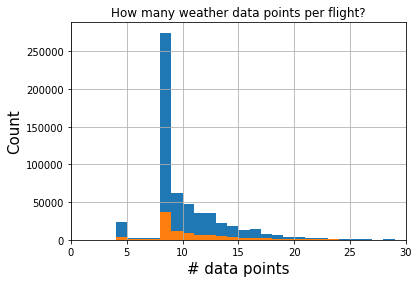

(0, 30)

In [0]:
# how much average weather data points per flight? number of rows (i.e. different observation times)

eda = spark.sql("""
  select
    count(*) as count1,
    count(*) as count2,
    count(*) as count3,
    dep_del15
  from 
    samples
  group by
    origin, destination, op_carrier, crs_dep_time_utc, dep_del15
""")

# calculate and display avg, min, max
datacounts = eda.agg({'count1':'avg', 'count2':'min', 'count3':'max'})
display(datacounts)

# histogram of how many rows of weather data there are per flight, beyond avg and min/max
eda.toPandas().groupby('dep_del15').count1.hist(stacked=True, bins=range(30))
plt.xlabel("# data points", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("How many weather data points per flight?")
plt.xlim([0,30])

#### Weather Variables

We now examine some distributions for temperature and pressure. For this we reduce our sample by a further factor 100. Note that we also explored visibility, ceiling height, wind speed and wind angle, similarly finding missing values and imputing them prior to modeling.

In [0]:
# select weather columns for our exploration - already parsed (see etl_weather.ipynb for parsing)
eda = spark.sql("""
  select
    temperature, int(visibility), dewpoint, pressure, ceiling, wind_speed, wind_angle,  dep_del15 
  from 
    samples
""").sample(False, 0.01, 0) # reduce by 100
df = eda.toPandas()

Out[10]:

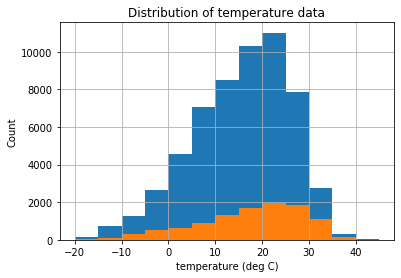

Text(0.5, 1.0, 'Distribution of temperature data')

In [0]:
df.groupby('dep_del15').temperature.hist(stacked=True, bins=range(-20,50,5))
plt.xlabel("temperature (deg C)")
plt.ylabel("Count")
plt.title("Distribution of temperature data")

We can see that (absent special '9999' codings for missing values, which were removed from this diagram scale), the temperatures do not quite follow a normal distribution, however for the purposes of GBT modeling we will call them "normal enough".

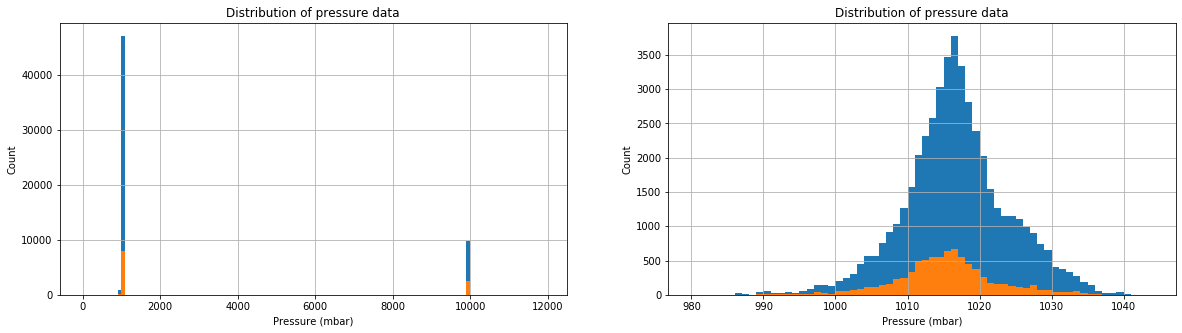

In [0]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
df.groupby('dep_del15').pressure.hist(stacked=True, bins=range(0,12000,100), ax=axs[0])
df.groupby('dep_del15').pressure.hist(stacked=True, bins=range(980,1045,1), ax=axs[1])
for i in range (2):
  axs[i].set_xlabel("Pressure (mbar)")
  axs[i].set_ylabel("Count")
  axs[i].set_title("Distribution of pressure data")

For pressure, we also see a significant amount of "9999"-coded missing data, and a nice normal distribution around a mean of 1016 mbar.

#### Temperature and Dew point - 4s and 9s

A curious feature is that there are noticeably fewer values ending in digits 4 and 9. We speculate that this is an artifact of human reading and rounding, although the neighboring columns don't support that in all cases. Below is an illustration of this curiosity on temperature, it also exists in dewpoint.

Out[45]:

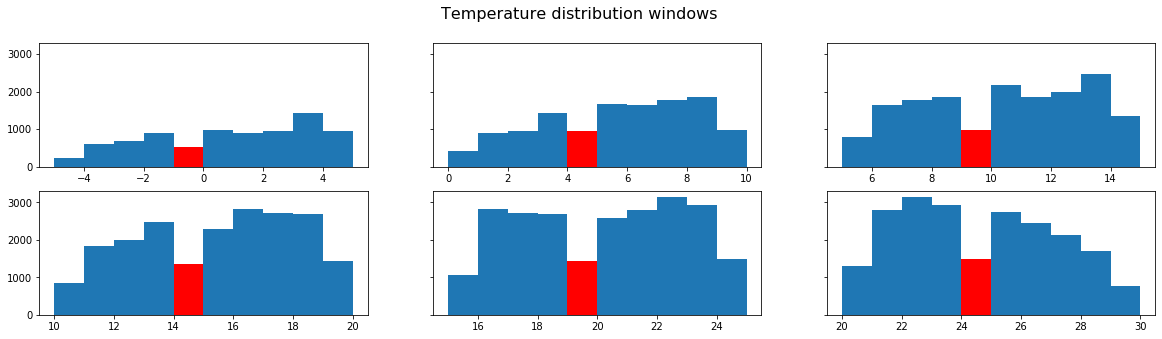

Text(0.5, 0.98, 'Temperature distribution windows')

In [0]:
fig, axs = plt.subplots(2, 3, figsize=(20, 5), sharey=True)
n, bins, patches = axs[0][0].hist(data = df[(df['temperature'] > -5) & (df['temperature'] < 5)], x='temperature', bins=range(-5,6))
patches[4].set_fc('r')
n, bins, patches = axs[0][1].hist(data = df[(df['temperature'] > 0) & (df['temperature'] < 10)], x='temperature', bins=range(0,11))
patches[4].set_fc('r')
n, bins, patches = axs[0][2].hist(data = df[(df['temperature'] > 5) & (df['temperature'] < 15)], x='temperature', bins=range(5,16))
patches[4].set_fc('r')
n, bins, patches = axs[1][0].hist(data = df[(df['temperature'] > 10) & (df['temperature'] < 20)], x='temperature', bins=range(10,21))
patches[4].set_fc('r')
n, bins, patches = axs[1][1].hist(data = df[(df['temperature'] > 15) & (df['temperature'] < 25)], x='temperature', bins=range(15,26))
patches[4].set_fc('r')
n, bins, patches = axs[1][2].hist(data = df[(df['temperature'] > 20) & (df['temperature'] < 30)], x='temperature', bins=range(20,31))
patches[4].set_fc('r')
fig.suptitle("Temperature distribution windows",fontsize=16)


## 3.4. Data Challenges

Our exploration of the data brings to attention several challenges, a few of which are discussed in this section. First, there is no column from the airport table that can be directly referencing a column from the weather table. Upon closer inspection, we see that the prefix of the call-sign column of the weather table can be derived from the airport code of an airport by prepending a *K*. A handful of airports e.g. Hawaiian and Alaskan cities don't follow this convention for call-signs. We form a custom table for these to map their airport codes and use these to extract the matching weather stations.

Second, we observe that time formats are different between the two data tables. We therefore see the need to convert all time formats to UTC to match them and pick the correct weather reports for the flight time for both origin and destination. We rely on an external source to get the airport code timezone mapping and join that with the airport code to convert local timezones to UTC format.

Third, weather data has a huge volume of records. To minimize the join size we only rely on report types that make most sense for aviation and only rely mainly on reports that have passed all quality control check and have originated from a NCEI (National Centers for Environmental Information) data source. To reduce join size early on, we filter out records that are not of interest to our analysis. For example, we filter out cancelled or diverted flights before we join with weather data.

Finally, large data volume and a shared cluster of resources are two constraints that we face throughout this project. There are complex join operations involving multiple steps. To mitigate efforts on duplicating these joins, we save the intermediate results, where feasible, and load the data from the saved files during reruns.

## 3.5. Extract-Transform-Load (ETL)
With over 30 million records in airport dataset and 600 million records in the weather dataset, it is clear that we have to be smart about what data we extract before we transform it and load it for our analysis. From the airport data, we filter out flights that have reported departure delays due to security delays because we don't have any features in the dataset that could relate with security delays and factors contributing to security delays are typically extrinsic to an aircraft in flight or weather. Since we are specifically looking for departure delays, we also filter flights that have been cancelled because they don't depart. We also eliminate diverted flights as they don't follow the prescribed route and hence might introduce other anomalous patterns. Weather dataset has reports with 12 different report types. We eliminate all reports that are not of type METAR routine (FM-15) or SPECI special (FM-16, as they are not specifically related to aviation. We also use only reports that have passed quality control checks of some form (codes 0, 1, 4, 5, 9). 

Before proceeding with the join, we transform the airport local times to UTC format on the airport dataset by looking up their IANA timezone information (which accounts for different daylight savings policies between states) in a separate table we imported from https://gist.github.com/mj1856/6d219c48697c550c2476#file-timezones-csv. 

We also compute an airport name mapping using the call sign field in the weather table: 4-letter call_sign codes that start with the letter "K" and are airport weather stations will have the airport code as the next 3 letters, with the notable exception of airports in Hawaii, Alaska, and the Caribbean. For the 25 remaining airports from these regions that did not have a straight match in the weather table, we manually created a lookup table with the applicable weather station call_signs, imported it into databricks and used it to patch the call_signs in the weather table. 

Wheather information is then parsed from array-like text fields. We also assign each wheather data point to a fixed hour, as joining on ranges did not scale well in our preliminary engineering experiments. 

We then join each flight record with 4 hours of weather - a range from 2,3,4 and 5 hours before the departure time - for both origin and destination. We then pivot weather into columns and aggregate multiple observations in the same hour. We save this ETL data in parquet format and load it for our analysis.

The details of our pre-join flight and weather data cleaning and preparation can be found in the notebooks [etl_flights](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/667068395498101/command/667068395498102) and [etl_weather](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/667068395498172/command/667068395498173), respectively. The code to join and pivot the cleaned and parsed sets is in [etl_join_pivot](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/667068395498191/command/667068395498192).

# 4. Feature Engineering

The features in the flights dataset, while being critical to understanding the key indicators for a flight's performance, are by no means sufficient in predicting departure delays. We are careful in selecting only features that are known to us before a flight's scheduled departure. After much deliberation, we don't include features from the airport table that could gives us any information about the flight that is not already known 2 hours prior to its scheduled departure time. We engineer a few additional features from airport and weather tables, which we expect to help our model predict delays better. In this section we cover a brief description of our features and our approach to extract, tansform and load the dataset.

## 4.1. Features

We select our features carefully keeping data relevance, feature dimensionality and collinearity in mind. From the airport table, we drop all performance indicator columns that are not known 2 hours prior to the scheduled departure, like time spent at gate, air time, taxi in etc. We also replace features that have high dimensionality with proxies that have lower dimensionality. For example, One hot encoding for both source and destination for 366 airports would give us 732 features.We substitute these with page rank of the source, destination and the edge weight between them, which gives us similar information with just 3 features. We also exclude columns that have high collinearity. For example, airtime and distance are highly correlated with each other. So we only pick distance and drop air time. In weather data, we only extract columns that cover the mandatory data section of the report. The optional data section has a very high ratio of missing values as most stations don’t report these. So we eliminate these columns. Below is an overview of the features we include in our model. These fall under three categories: categorical, numeric and target variables.

**Categorical Variables**
> - **departure block:** This indicates the time block when the flight departed. We transform these to a categorical variable that indicates which hour the block belongs to. The variable takes one of 24 values 0 to 23. For example a departure block of 1400-1459 would map to value 14.
> - **carrier:** This is a categorical variable that gives the code of the airlines that operates the flight. We have 19 unique carriers in the training data
> - **equipment delayed:** An aircraft that is delayed by more that 45 min in a previous flight (in the previous 8 hours) is unlikely to recover from the delay in its subsequent legs of flights for the day. So we leverage the tail number and other relevant fields from the airport table to engineer an indicator variable that suggests if a given aircraft was delayed in the previous 8 hours prior to the current flight. This is done by making a table of delayed aircraft and times, and propagting that information 8 hours into the future with a 8-fold self-join, then identifying flight with that aircraft in those 8 hours. We believe this variable would be an important feature in predicting the departure delay. 
> - **date and time variables:** These are variables like month, day of month and day of week all of which potentially have a say in discerning more delays at certain times of the year or week compared to others as demonstrated in EDA section 3.3.1. We do not add year to our list of features as we don't see much variability between the years 2015 to 2019 as there were no (1) major sporting or iconic events that were special to time period and (2) no globally impacting events like a pandameic that wildly changed travel patterns.

**Numeric Variables**
> - **distance:** This is the distance between the source and destination airports.
> - **key weather indicators:** As frequent flyers we know that flight departures/arrivals are affected by weather conditions at the origin and destination locations. We create features that extract key weather indicators like wind, pressure, visibility, temperature, dew-point etc. from a two to five hours window prior to the flight's scheduled departure from both the source and destination stations. This required us to convert the flight departure times from local to UTC format to have the same time of reference between both tables. To keep data between stations consistent, we only use mandatory indicators from the weather reports and exclude optional indicators. Where available we only use weather reports of the highest quality and move to a lower quality report only when such a report is not available. We also transform all temperature related feature to Kelvin to eliminate negative values.
> - **page rank of airports from airport graph:** Airlines operate via hubs relying heavily on certain key airports to make connections between different flights. A delay at these crucial airports could cause a rippling effect and lead to delays on the entire air traffic network. We therefore believe that the page rank of the origin and destination airports would be important features in helping predict departure delays. We compute the page rank of all airports in our training data. We use the source and destination page rank in lieu of the origin and destination airport code. This gives us a compact numerical feature without using a large one hot encoded categorical variable.
> - **edge weights of origin/destination from airport graph**: We include the edge weight of an origin/destination pair computed by our page ranking as that might serve a proxy for how important a connection is in the flight network and might have an impact in determining delays.
> - **airport/aircraft throughput variables:** We believe throughput parameters will give a concrete number of how many aircrafts fly between an origin and destination. We engineer a few daily throughput features such as average number of flights between an origin and destination, average number of flights by airlines between origin and destination etc. We compute these on the fly on the training/test data.
> - **average trips per day:** This feature quantifies the number of trips a specific carrier makes on a daily basis.

**Target Variable (Label)**
> - **is_delayed:** Since we are using supervised learning, we leverage the *dep_del15* column from the airport dataset to determine our label column. This is an indicator variable for if the flight is on-time (class 0) or delayed (class 1) and will be used to evaluate our predictions from the model. There is one airlines *Endeavour Air* (previously operated under the name Pinnacle Airlines, Carrier code 9E), which operates Delta Airlines connections, that reports *dep_del15* as null for flights that departed on time. We transform *dep_del15* such that if it is null or 0 then *is_delayed* label is set to 0, otherwise it is set to 1.

In all we end up with 161 features, 65 of which are numerical and 96 are one hot encoded values of the 6 categorical variables we have.

<figure>
  <img src="https://raw.githubusercontent.com/chitraagastya/MIDS_Projects/master/Flight_delays/EquipDelayed.png"><br>
  <figureCaption>Figure 13.1 Illustration of aircraft delay rippling into future</figureCaption>
</figure>

### 4.1.1. Computing Features
Features we engineer like page rank and throughput features are only computed on the training data that we have access to. To derive these features for test and validation data sets, we do an outer join with the training data on relevant keys and pick the appropriate feature values for the given test row. If we dont find a value, we coalesce with a default value depending on the feature.

### 4.1.2. Feature Distributions
Let us look at the distribution of some of these features to see if there are discernable differences in the distributions of delayed flights versus on-time flights. We first get a small sample from the dataset to be able to see the distributions. We pick a day of the month and randomly sample down the data further to only use 50% of the data returned. We can set the *day* and *fraction* in code below, to different values as required.

In [0]:
# pick a sample from the dataset...half of all records from 15th of the month
# if the count on this very large, you can sample it down further
fraction = 0.5
day = 15
sample_data = preProcessData(train_data.where(f'day_of_month == {day}').sample(withReplacement=False, fraction=fraction)).toPandas()

The distribution plot of some of the airport features shown below, clearly indicates that there are difference between the classes. For example, Distribution by carrier clearly shows that carriers like Delta Airlines (DL) and Southwest Airlines (WN) have stark difference in counts between the delayed and on-time flights. The differences are conspiuous in departure blocks (*dep_blk*) 5 through 10, month 3,9,10, and the page rank (*dest_pagerank*) features.

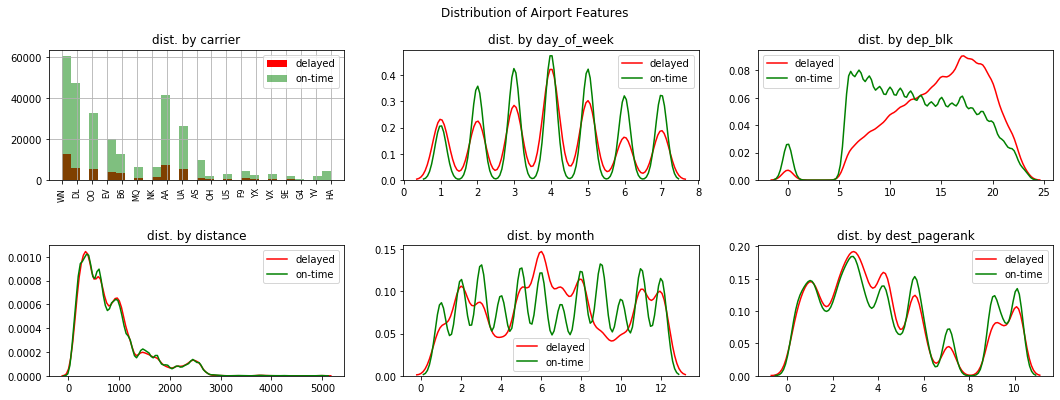

In [0]:
# plot airport distributions
plot_flightInfo(sample_data, ['op_carrier','day_of_week', 'dep_blk', 'distance', 'month', 'dest_pagerank'])


The distribution plot of some of the weather features in log scale is shown below. The class difference is more pronounced in some ranges of features like wind speed, wind angle, temperature, visibility and ceiling. We use log scale here only to demonstrate the class difference. We don't transform our features to log scale as our focus is on decision trees which dont require this type of transformation.

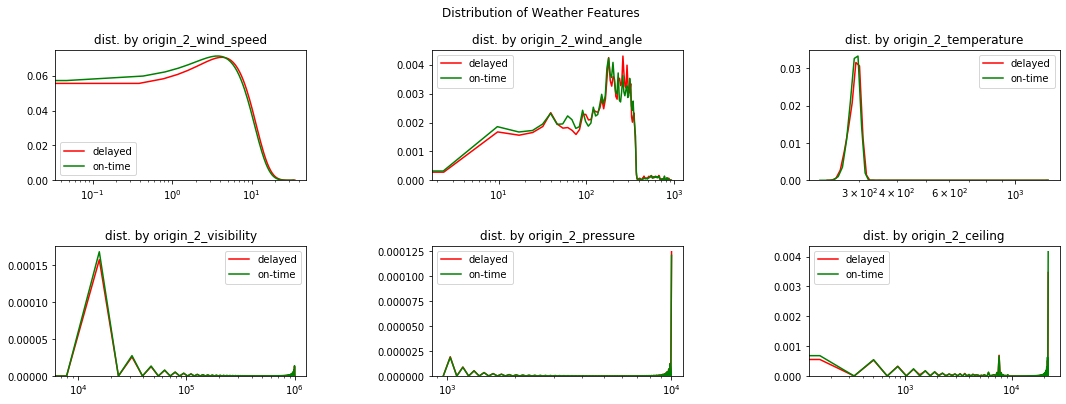

In [0]:
# plot some of the weather distributions
plot_weatherInfo(sample_data, ['origin_2_wind_speed', 'origin_2_wind_angle', 'origin_2_temperature', 
        'origin_2_visibility', 'origin_2_pressure', 'origin_2_ceiling' ])

The distributions of the features indicate to us that features like carrier, departure block, month, day of week, page rank, wind speed, wind angle etc. would  potentially play a role in helping our estimator discrimnate between delayed flights and on-time flights. Which of these are relatively more important than the others would only be clear post modeling and covered in section 6.1.2.

### 4.1.3. Preprocessing and Dealing with Missing Values
Any preprocessing required for these features is performed before we feed the data to our pipeline. As indicated in section 3.3.3, we observe that some of the weather features have been reported with an unknown value (e.g. 9999 for pressure, 99999 for ceiling, 999.9 for wind speed and 999 for wind angle). We have to fix these because they would otherwise alter our estimates when we standardize our numeric values. We therefore have a preprocessing step where we replace these values with null values so that later in the pipeline, the imputer will take care of substituting them with the column means. We also convert temperature and dew point temperature from degree Celcius to Kelvin so that we dont have to deal with negative numbers when computing the standard statistics. We convert some of our features from string and boolean to numeric so our model only has to deal with numeric values. We also convert some of the target labels for on time departures from null to 0. We then feed this preprocessed set of features to our model pipeline, which takes care of transforming the data to a format that is required by the model.

# 5. Algorithm Exploration and Theory

As our outcome variable is binary, we focus on classification based estimators. To help set a baseline, we use two simple estimators, logistic regression and single decision tree (SDT), and two ensemble based classifiers, random forest (RF) classifier and gradient boosting trees (GBT).

## 5.1. Estimators
We choose logistic regression because of its robustness in determining a dichotomous discrete outcome variable based on maximum likelihood. Logistic regression, however does requires us to carefully select the features and standarize them. 

SDT is quick to implement and easy to interpret. Features don't need to be scaled or selected. We mainly choose it to get better insight into what features the tree deems important in the classification of a delayed vs on-time departure. However, we are cautious with SDT as it tends to overfit the training data. 

The Random Forest classifier is an ensemble classifier that has the advantage of independently training individual trees in parallel and outputs the mode of the class outputs of the individual trees. It combines bagging technique with the randomized feature selection at every tree split. This makes RF more robust than and more generalizable than SDT. They are known to be less sensitive to outliers. 

The GBT classifier is also a prediction model that is an ensemble of smaller decision trees. It iteratively builds the model and generalizes the model by optimizing over the gradient i.e. differentiable log loss function. It combines weaker models into a stronger model by iteratively learning from the residuals. With each iteration the trees try to reduce the residual moving one step closer to the ground truth. GBT is slower than RF as it learns the model iteratively but is benchmarked to be a better learner. So we choose this estimator as one of our candidates for arriving at a baseline.

## 5.2. Baseline Model

To establish a baseline model, we first start with a very basic model which is trained on the features extracted only from the airport data to see if that helps us predict any departure delays. We quickly observe that the classifiers are hardly able to learn anything on the minority class. We then feed our features engineered from the weather data and the airport data (as explained in section 4) into our classifiers. Feature engineering definitely enhances our models' ability to learn and we observe that all four classifiers estimate delays better. *Table 3* below shows results of our runs for the basic features and enhanced features.

<table>
  <caption>Table 3: Baseline Model - Results</caption>
  <tr>
    <td><img src="https://raw.githubusercontent.com/chitraagastya/MIDS_Projects/master/Flight_delays/Baseline-results.png" width="800px"></td>
  </tr>
</table>

We see that both the ensemble models show high precision. The results for RF classifier is with 25 trees and a maximum depth of 12. We initially trained the model with the default settings. While that model gave a higher precision of 0.75 on class 1 labels, it was only able to identify about 4000 true positives. So we adjusted a few of the model knobs to come up with 25 trees and a depth of 12. This level of depth is quite large and we are afraid might cause overfitting on the test set. 

The GBT classifier uses the default settings with learning rate 0.1, maximum depth 5, maximum iteration of 20 and max bin size of 32. With trees that are smaller in depth, GBT is able to achieve similar performance as that of the RF classifier. So we pick the GBT classifier as our estimator for further fine tuning.

*NOTE: Click here for the [Baseline Selection Notebook](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/3450569410557829/command/3450569410557859)*

## 5.3. Gradient Boosting Tree Classifier

In this section we cover the theory behind the gradient boosting tree classifier, our algorithm of choice, based on the results of our baseline model. The GB classifier is an ensemble model that works on the boosting principle similar to Adaboost, combining a bunch of weaker classifiers (usually, but not necessarily trees) to give a strong model. We describe the math and algorithm of the gradient boosting ensemble for trees, assuming the reader is already familiar with how the underlying decision trees themselves are constructed. The GBT iteratively fits a series of decision trees, wherein every new tree corrects the errors left by the trees preceding it. Here we are fitting the model to a binomial distribution with two classes 1 and 0. Our mathematical description and toy example follow the definitions given in ["Gradient Boost Part 3: Classification"](https://www.youtube.com/watch?v=jxuNLH5dXCs) and ["Gradient Boost Part 4: Classification Details"](https://www.youtube.com/watch?v=StWY5QWMXCw)

### 5.3.1. The Algorithm

Given an input \\( D = \\{(x_i, y_i) \\}\\) for \\(i=1...n\\) and a differentiable loss function \\(L(y_i, F(x_i)) \\), where \\(x\\) is the set of features and \\(y\\) is an observed outcome, the algorithm of the gradient boosting tree classifier is as shown below:

Step 1: Initialize an estimator prediction with the \\( F_0 \\) with the log-odds of the maximum likelihood estimator, i.e.
\\(F_0 = log(\frac{p}{(1 - p)}) \\) where \\(p\\) is the likelihood of a sample belonging to the class 1.
 
Step 2: Iterate from m = 1 to M:

> 2.1. Compute the pseudo-residuals by taking the difference between the observed and the predicted value i.e. 
>  
> $$
> \begin{aligned}
> r_{im} &= \left\[ \frac{\partial L(y_i, F_{m-1}(x_i))}{\partial F_{m-1}(x_i)} \right\] \\\
> &= obs_i - pred_{i,m-1}
> \end{aligned}
> $$  
>
> 2.2. Fit a decision tree to the residuals computed above and create a limited number of leaf nodes i.e.terminal regions \\( R_{jm} \\) for \\(j = 1..J_m\\)
>  
> 2.3. Compute output values \\( \gamma_{jm} \\) for each leaf node of the tree to minimize the second-order Taylor-approximation of the log-likelihood-based loss function:
>   
> $$
> \begin{aligned}
> \gamma_{jm} &= argmin {\sum}_{x_i \in R_{ij}} L(y_i, F_{m-1}(x_i) + \gamma) \\\
> &\approx \sum_{x_i \in R_{ij}} \frac{r_{im}}{pred_{i,m-1}*(1-pred_{i,m-1})}
> \end{aligned}
> $$
> 
> 2.4. Update the estimator value to: 
>   
>   $$ F_m(x) = F_{m-1}(x) + \eta * {\sum}_{j = 1}^{J_m} \gamma_{jm}I (x \in R_{jm}) $$
>   
> where 
>   
>   $$ I (x \in R_{jm}) $$
>  
>  is an indicator variable that takes the value of \\( 1 \\) if \\(x\\) belongs to region \\(R_{jm} \\), or \\( 0 \\) otherwise, and \\(\eta \\) is the learning rate.

The successive decision tree regressors are stored. Prediction consists of starting from \\( F_0 \\) and letting each tree add another partial residual to the value, and then moving the result from log-odds space back into probabilities, using a threshold value (here 0.5) to do the final classification. We now demonstrate this in Pandas and Numpy:

### 5.3.2. Toy Example

We build a toy example to help understand the mechanism of how a GBT classifier learns. To illustrate the concept, we have a small (made-up) flights data table with 15 rows of data as shown below. This is a subset of the columns we use for our real algorithm, as using all of those would be distracting. Also note that some columns (the last 3) are added as scratch space for our classifier. We run this data through the steps of the algorithm listed in section 5.3.1 above.

*NOTE: To see the code in full, please click on the 'Show Code' link in blue in cell below. We hide some of the code cells for brevity. You can also 
check out our [Toy Example Notebook](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/4061768275140778/command/4061768275140793)*

In [0]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree

def fit_residuals(df, max_leaves):
    features = ['origin_id','dest_id','month_id','op_carrier_id','dep_time_cst','arr_time_cst','origin_2_visibility','dest_2_visibility','origin_pagerank','dest_pagerank','equipment_delayed']
    label = ['residuals']
    X = df[features].to_numpy()
    Y = df[label].to_numpy()
    clf = DecisionTreeRegressor(max_leaf_nodes=max_leaves)
    clf = clf.fit(X, Y)
    return clf


def predict_residuals(clf, df):
    features = ['origin_id','dest_id','month_id','op_carrier_id','dep_time_cst','arr_time_cst','origin_2_visibility','dest_2_visibility','origin_pagerank','dest_pagerank','equipment_delayed']
    X = df[features].to_numpy()
    return clf.predict(X)
  
# log odds of a probability, and reverse transformation
def log_odds_from_p(p):
    return np.log(p/(1-p))

def p_from_log_odds(log_odds):
    return np.exp(log_odds)/(1+np.exp(log_odds))
  
data = """
  id,origin,destination,month,op_carrier,origin_id,dest_id,month_id,op_carrier_id,dep_time_cst,arr_time_cst,origin_2_visibility,dest_2_visibility,origin_pagerank,dest_pagerank,equipment_delayed,label,prediction,residual,counts
  1,ord,atl,aug,dl,1,2,8,1,1625.00,1900,10000,2000,3,1,0,1,0,0,0
  2,ord,sea,aug,as,1,3,8,2,1600.00,2200,10000,5000,3,4,0,0,0,0,0
  3,ord,jfk,jul,ua,1,4,7,3,1756.00,2359,10000,2000,3,2,0,1,0,0,0
  4,ord,phx,aug,ua,1,5,8,3,800,1234,10000,10000,3,6,0,1,0,0,0
  5,ord,den,jul,dl,1,6,7,1,500.00,800,10000,10000,3,3,0,1,0,0,0
  6,ord,sjc,aug,as,1,7,8,2,1100.00,1700,10000,10000,3,7,0,0,0,0,0
  7,ord,bos,sep,ua,1,8,9,3,1600.00,1800,10000,10000,3,5,0,0,0,0,0
  8,ord,atl,sep,dl,1,2,9,1,1734.00,1900,10000,10000,3,1,0,0,0,0,0
  9,ord,sea,jul,ua,1,3,7,3,1356.00,2000,10000,3000,3,4,0,1,0,0,0
  10,ord,jfk,aug,ua,1,4,8,3,1000.00,1200,10000,10000,3,2,0,1,0,0,0
  11,ord,den,aug,dl,1,6,8,1,1712.00,2023,10000,10000,3,3,0,0,0,0,0
  12,ord,jfk,jul,ua,1,4,7,3,1543.00,1800,10000,2000,3,2,0,1,0,0,0
  13,ord,atl,jul,dl,1,2,7,1,1645.00,1952,10000,2000,3,1,0,1,0,0,0
  14,ord,bos,aug,as,1,8,8,2,1930.00,2200,10000,2000,3,5,0,1,0,0,0
  15,ord,sea,aug,ua,1,3,8,3,834.00,1400,10000,10000,3,4,0,1,0,0,0
"""
df = pd.read_csv(StringIO(data), header = 0)
df

Out[16]:

,id,origin,destination,month,op_carrier,origin_id,dest_id,month_id,op_carrier_id,dep_time_cst,arr_time_cst,origin_2_visibility,dest_2_visibility,origin_pagerank,dest_pagerank,equipment_delayed,label,prediction,residual,counts
0,1,ord,atl,aug,dl,1,2,8,1,1625.0,1900,10000,2000,3,1,0,1,0,0,0
1,2,ord,sea,aug,as,1,3,8,2,1600.0,2200,10000,5000,3,4,0,0,0,0,0
2,3,ord,jfk,jul,ua,1,4,7,3,1756.0,2359,10000,2000,3,2,0,1,0,0,0
3,4,ord,phx,aug,ua,1,5,8,3,800.0,1234,10000,10000,3,6,0,1,0,0,0
4,5,ord,den,jul,dl,1,6,7,1,500.0,800,10000,10000,3,3,0,1,0,0,0
5,6,ord,sjc,aug,as,1,7,8,2,1100.0,1700,10000,10000,3,7,0,0,0,0,0
6,7,ord,bos,sep,ua,1,8,9,3,1600.0,1800,10000,10000,3,5,0,0,0,0,0
7,8,ord,atl,sep,dl,1,2,9,1,1734.0,1900,10000,10000,3,1,0,0,0,0,0
8,9,ord,sea,jul,ua,1,3,7,3,1356.0,2000,10000,3000,3,4,0,1,0,0,0
9,10,ord,jfk,aug,ua,1,4,8,3,1000.0,1200,10000,10000,3,2,0,1,0,0,0


We set some of the hyper parameters to help our algorithm converge faster. We also drop superfluous columns and only retain features that we want to use for our model.

**Step 1:** We first initialize the model i.e. \\(F_0\\) to the log of odds to make an initial prediction. A quick look at the *label* columns shows that we have 10 flights that are delayed and 5 that are not. So the probability \\(p\\) of flight being delayed in \\(\frac{2}{3} = 0.6666677 \\). The log of odds for this is given by: \\(log(odds) = log (\frac{p}{1 - p}) = 0.693147\\). Our initial prediction which is the probability of the log of odds is given by the sigmoid function  \\(\frac{e^{log(odds)}}{1 + e^{log(odds)}} = 0.666667\\). With these values we enter the iterative step of our GBT algorithm.

In [0]:
# remove id and text columns, they were only in there for clarity
df.drop(['origin','destination','month','op_carrier'], axis = 1, inplace=True)

# set some hyperparams
learning_rate = 0.8
max_leaves = 4
iterations = 5

# make initial prediction (based on average of true labels)
initial_leaf = log_odds_from_p(df['label'].mean())
df['predictions'] = p_from_log_odds(initial_leaf)

**Step2:** We now iteratively learn from our data. In our example \\(M = 5\\). So we iterate five times, as shown in code below. We compute our pseudo residuals by taking the difference between the observed and the predicted values. GBT builds a decision tree to fit these residuals and ensures that the tree has a maximum of 4 leaves or a depth of 2. With each iteration the estimator is minimizing the error. With each iteration, we compute a new tree by multiplying the current tree's output values with a learning rate \\(\eta \\) and adding that to the previous prediction in log-odds space and transforming back to a probability. The results of all five executions are shown below with the predictions as well as the residuals at each iteration. We also display the tree that minimizes the loss at each iteration. Model fit is complete with the fifth iteration. 

Note that in the model below, we don't really operate by inspecting the decision tree regressors themselves, but reconstruct their leaf ouput values from the distinct predictions.

The output below the code shows the iterations of decision trees along with the shrinking residuals for 5 samples (out of 15, for brevity).

predictions,residuals
0.6667,0.3333
0.6667,-0.6667
0.6667,0.3333
0.6667,0.3333
0.6667,0.3333


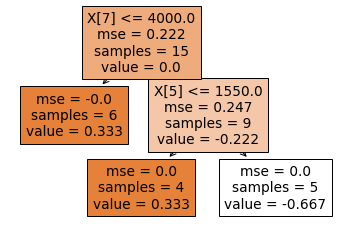

predictions,residuals
0.8691,0.1309
0.1536,-0.1536
0.8691,0.1309
0.8691,0.1309
0.8691,0.1309


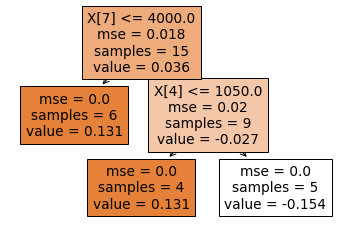

predictions,residuals
0.9434,0.0566
0.0659,-0.0659
0.9434,0.0566
0.9434,0.0566
0.9434,0.0566


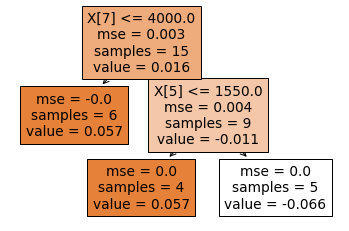

predictions,residuals
0.975,0.025
0.0291,-0.0291
0.975,0.025
0.975,0.025
0.975,0.025


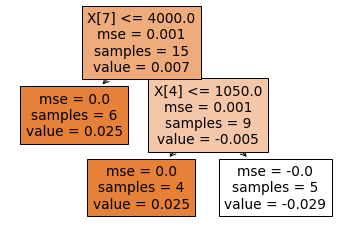

predictions,residuals
0.9888,0.0112
0.013,-0.013
0.9888,0.0112
0.9888,0.0112
0.9888,0.0112


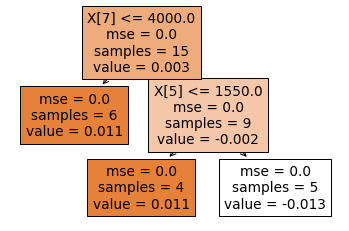

In [0]:
regressors = []
for i in range (iterations):
    # calculate the pseudo-residuals
    df['residuals'] = df['label']-df['predictions']
    display(df[['predictions','residuals']].head(5).round(4))
    
    # make a tree to predict the pseudo-residuals, plot it, save it
    clf = fit_residuals(df, max_leaves)
    plot_tree(clf, filled=True)
    plt.show()
    regressors.append(clf)
    
    # run prediction for the residuals
    df['priors'] = df['predictions']
    df['predictions'] = predict_residuals(clf, df)

    # group the priors by predictions to reconstruct the leaf outputs   
    df['leaves'] = df['predictions']
    df['priors_transformed'] = df['priors']*(1-df['priors'])
    grouped = df[['priors', 'priors_transformed', 'predictions','leaves']] \
        .groupby('leaves', as_index=False) \
        .agg({'predictions': 'sum', \
             'priors_transformed': 'sum'})
    # the reconstructed "tree" is a dictionary of tree predictions -> the leaf output we need to construct
    tree = {row['leaves']:(row['predictions']/row['priors_transformed']) for index, row in grouped.iterrows()}
    
    # update the predictions from the leaves by scaling them with the learning rate
    # and adding them onto previous predictions in log-odds space
    df['leaf_outputs'] = np.vectorize(lambda x:tree[x])(df['leaves'])
    df['predictions'] = p_from_log_odds(log_odds_from_p(df['priors']) + df['leaf_outputs']*learning_rate)

**Prediction and Evaluation:** Now that our model fit is complete, we predict the samples to see how well the classifier has learned. The result shows the actual labels alongside with the predicted labels 'pred_label'. The predicted label is a boolean with a value True for if flight is delayed or False is the flight is on-time. We compute it using the prediction probability value. If this prediction probability \\(p > 0.5 \\) then the *pred_label* is set to *True*, and *False*), otherwise. The results show that the estimator was able to predict every flight in our toy dataset (which was also our training set) correctly.

In [0]:
def predict(df):
    # start with our initial naive assessment
    df['predictions'] = initial_leaf
    
    # now predict and add up residuals through the regression trees
    for r in regressors:
        df['predictions'] += learning_rate*predict_residuals(r, df)
    
    # convert back from log-odds space, cast to class
    df['pred_p'] = np.vectorize(p_from_log_odds)(df['predictions'])
    df['pred_label'] = df['pred_p'] > 0.5
    return df
  
result = predict(df)
result[['label','pred_label']]

Out[19]:

,label,pred_label
0,1,True
1,0,False
2,1,True
3,1,True
4,1,True
5,0,False
6,0,False
7,0,False
8,1,True
9,1,True


# 6. Algorithm Implementation

In this section we will cover the details of our implementation to build an end to end pipeline with a GBTClassifier as the estimator to fit our training data. We also cover some approaches we take to address the class imbalance issues we see with our dataset. In addition to the basic model, we also try a couple of secondary models to specifically address: 
> - the delays between 5 to 7pm when delays are the highest on any given day 
> - the delays around winter holidays. 

We use Spark ML for implementing our models. 

*NOTE: To maintain brevity, we hide code cells that contain helper methods; these can be expanded by using the 'Show code' text in blue on the cell. We only show the code for the main model. Details of code for the SMOTE techniques and hypertuning as provided as a link to separate notebooks which contain the full detail*

## 6.1. Model Pipeline

A pipeline is a sequence of stages, each of which is either a transformer or an estimator. *Figure 16* below shows a schematic of the end to end pipeline we build for training and evaluating our model. The *Pipeline* class exposes a *fit* method which when called, executes the stages in order. If the stage is a transformer, the *transform* method of the transformer is called on the input dataset to produce the dataset required for the next stage. If the stage is an estimator, the *fit* method of the estimator is called to fit a model to the input dataset. The fitted model from a pipeline is then used to transform a test dataset and can be evaluated using an evaluator.

We one hot encode all of our categorical variables. We retain any new values we encounter in the test data that was not previously seen in the training data. We only see null values in features related to weather data, which we impute with the column mean. The reason we choose mean is because in the absence of other information, it provides an unbiased point estimate. We then convert all numeric variables to vectors and then standardize these values using the StandardScaler. We then combine the one hot encoded categorical vectors and the standardized numeric vectors into one feature vector called *featrues*. We maintain a string *label* for each record to indicate the true class the record belongs to. We then feed the true label and the features vector to our estimator to fit a model to the features. We then use an evaluator to evaluate the model. 

*NOTE: For weather features we tried imputing the values with the nearest known neighbor. But that gave us a very small score improvement for all the intensive calculations performed. So we decided to keep the imputing logic simple and just impute by mean instead.*

<figure>
  <img src="https://raw.githubusercontent.com/chitraagastya/MIDS_Projects/master/Flight_delays/Pipeline.png" width="800px"><br>
  <figurecaption>Figure 16: End to End Pipeline</figurecaption>
</figure>

In [0]:
from pyspark import SparkContext
from pyspark.sql import functions as f
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, IntegerType, NullType, ShortType, DateType, BooleanType, BinaryType
from pyspark.sql import SQLContext, SparkSession

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pyspark.sql import types
SEED = 7

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image
from pyspark.ml import Pipeline, PipelineModel
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, Imputer, StandardScaler, FeatureHasher, SQLTransformer
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier, GBTClassifier, LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics


# Enable for pretty viewing of tables
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)

# Variables
username = dbutils.notebook.entry_point.getDbutils().notebook().getContext().tags().apply('user')
userhome = 'dbfs:/user/' + username
project_path = "dbfs:/user/chitra.agastya@ischool.berkeley.edu/FinalProject/"
train_dir = "train.parquet"
dev_dir = "dev.parquet"
test_dir = "test.parquet"
mode = 'full'
outcome = 'is_delayed'
run = 'full'

# Load the training data
def loadData(dirName, viewName):
  data = spark.read.option("header", "true").parquet(f'{project_path}{dirName}/*.parquet')
  data.createOrReplaceTempView(viewName)
  return data

def preProcessData(dff, outcome = 'is_delayed'):  
  
  # Take care of unknown weather values
  # Convert pressure 9999 to null
  for col in [x for x in dff.columns if x.endswith('_pressure')]:
    dff = dff.withColumn(col, f.when(f.col(col) == 9999, None).otherwise(f.col(col)))
    
  # Convert ceiling 99999 to None
  for col in [x for x in dff.columns if x.endswith('_ceiling')]:
    dff = dff.withColumn(col, f.when(f.col(col) == 99999, None).otherwise(f.col(col)))
    
  # Convert wind_speed 999.9 to None
  for col in [x for x in dff.columns if x.endswith('_wind_speed')]:
    dff = dff.withColumn(col, f.when(f.col(col) == 999.9, None).otherwise(f.col(col)))
    
  # Convert wind_speed 999.9 to None
  for col in [x for x in dff.columns if x.endswith('_wind_angle')]:
    dff = dff.withColumn(col, f.when(f.col(col) == 999, None).otherwise(f.col(col)))
    
  # Convert visibility and ceiling to integer values
  for col in [x for x in dff.columns if x.endswith('_visibility') or x.endswith('_ceiling')]:
    dff = dff.withColumn(col, dff[col].cast(IntegerType()))

  # Convert temperature and dewpoint to Kelvin by adding 273
  for col in [x for x in dff.columns if x.endswith('_temperature') or x.endswith('_dewpoint')]:
    dff = dff.withColumn(col, dff[col] + 273)
    
  dff = dff.withColumn('time_blk', ((dff['dep_blk'].cast(IntegerType()) + 2) / 8).cast(IntegerType()))
  # cast the equipment_delayed to numeric int
  dff = dff.withColumn('equipment_delayed', dff['equipment_delayed'].cast(IntegerType()))
  
  # create the outcome column
  dff = dff.withColumn(outcome, f.when(f.col('dep_del15') == 1, 1)
                                .otherwise(0)
                      )
  return dff

# a more parallel attempt
def createStages(dff, outcome, run = 'basic'):
  stages = []
  
  # Get the categorical columns
  categoricalColumnsNoAirports = ['month', 'day_of_month', 'day_of_week', 'op_carrier', 'dep_blk']
  # add equipement_delayed for non-basic runs
  if run != 'basic':
    categoricalColumnsNoAirports += ['equipment_delayed']
  # and our full set includes origin and destination for string indexing 
  filterColumns = ['origin', 'destination'] 
  categoricalColumns = filterColumns + categoricalColumnsNoAirports
  
  
  # index their strings. sadly, no parallel method for that
  stringIndexers = [StringIndexer(inputCol = col, outputCol = col + 'Index').setHandleInvalid("keep") for col in categoricalColumns]
  stages += stringIndexers
          
  # one-hot encode the categorical columns
  encoder = OneHotEncoder(inputCols=[col + 'Index' for col in categoricalColumnsNoAirports], \
                          outputCols=[col + "classVec" for col in categoricalColumnsNoAirports], \
                          handleInvalid='keep')
  stages += [encoder]
  
  # add the outcome label
  label_stringIdx = StringIndexer(inputCol = outcome, outputCol = 'label').setHandleInvalid("keep")
  stages += [label_stringIdx]

  # Get numeric columns
  numericCols = ['distance', 'dest_pagerank', 'src_pagerank', 'weight']
  if run != 'basic':
      numericCols += [x for x in dff.columns if x.startswith('avg_')] + \
      [x for x in dff.columns if (x.startswith('origin_') or x.startswith('destination_'))]
  
  # impute, vectorize and scale numeric columns
  imputedCols = [col+"_Imputed" for col in numericCols]
  imputer = Imputer(inputCols=numericCols, outputCols=imputedCols, strategy='mean')
  
  # from our runs, it looks like the parallel imputer might not have a deterministic output column order
  # make sure the resulting columns are in a defined order
  cols = ['label', 'originIndex', 'destinationIndex'] + [c+"classVec" for c in categoricalColumnsNoAirports] + imputedCols
  col_string = ','.join(cols)
  feature_projector = SQLTransformer(statement=f"SELECT {col_string} FROM __THIS__")
  
  # now convert some of this into a vector and scale its dimensions independently
  assembler = VectorAssembler(inputCols=imputedCols,outputCol="numeric_vect", handleInvalid='keep')
  scaler = StandardScaler(inputCol="numeric_vect", outputCol="numeric_scaled")
  stages += [imputer, feature_projector, assembler, scaler]
  
  # put all the features together
  feature_assembler = VectorAssembler(inputCols=[c + "classVec" for c in categoricalColumnsNoAirports] + ["numeric_scaled"], outputCol="features")
  hash_assembler = VectorAssembler(inputCols=["originIndex", "destinationIndex", "numeric_scaled"], outputCol="hash_vector")
  # final projection of columns, review this carefully
  outputCols = ['label', 'originIndex', 'destinationIndex', 'hash_vector', 'numeric_scaled', 'features'] + [c + "classVec" for c in categoricalColumnsNoAirports]
  col_string = ','.join(outputCols)
  final_projector = SQLTransformer(statement=f"SELECT {col_string} FROM __THIS__")
    
  stages += [feature_assembler, hash_assembler, final_projector]
  
  return stages

# Transform the train, dev and test data with the pipeline
def transformData (d, pl_model, cols):
  return pl_model.transform(d).select(cols)

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    """
    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(4, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])*100


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def predictAndEvaluate (data, model, evaluate = True):
    predictions = None
    if model:
        predictions = model.transform(data)
        
    if predictions:
        evaluator = BinaryClassificationEvaluator(labelCol="label")
        print("Test Area Under ROC: {}".format(str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"}))))
        print("Test Area Under PR: {}".format(str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"}))))

        evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
        accuracy = evaluator.evaluate(predictions)
        print("Accuracy = %g " % (accuracy))
        print("Test Error = %g " % (1.0 - accuracy))
        
    if predictions and evaluate:
      evaluateModel(predictions.select('prediction', 'label').rdd.map(tuple), [0,1])

    return predictions

def evaluateModel(predictionAndLabels, labels):
    # Instantiate metrics object
    metrics = MulticlassMetrics(predictionAndLabels)
    
    # Confusion Matrix
    #print("Confusion matrix:")
    #print(metrics.confusionMatrix().toArray())
    plot_confusion_matrix(metrics.confusionMatrix().toArray(), target_names = ['On-time', 'Delayed'])

    # Overall statistics
    precision = metrics.precision(1.0)
    recall = metrics.recall(1.0)
    f1Score = metrics.fMeasure(1.0)
    print("Summary Stats")
    print("Precision = %s" % precision)
    print("Recall = %s" % recall)
    print("F1 Score = %s" % f1Score)

    # Statistics by class
    for label in sorted(labels):
        print("Class %s precision = %s" % (label, metrics.precision(label)))
        print("Class %s recall = %s" % (label, metrics.recall(label)))
        print("Class %s F1 Measure = %s" % (label, metrics.fMeasure(float(label), beta=1.0)))

    # Weighted stats
    print("Weighted recall = %s" % metrics.weightedRecall)
    print("Weighted precision = %s" % metrics.weightedPrecision)
    print("Weighted F(1) Score = %s" % metrics.weightedFMeasure())
    print("Weighted F(0.5) Score = %s" % metrics.weightedFMeasure(beta=0.5))
    print("Weighted false positive rate = %s" % metrics.weightedFalsePositiveRate)
    
#partition the train_sample into an 80% for train and 20% for validation so that early stopping can be enabled
def createTrainValSplit(dff, ratio =0.8):
    # do a split within training data
    t = dff.sample(fraction = ratio, seed=SEED)
    v = dff.subtract(t)
    
    # add validation column
    t = t.withColumn('validation', f.lit('False').cast(BooleanType()))
    v = v.withColumn('validation', f.lit('True').cast(BooleanType()))
    return t.union(v)
  
#load the ETL data and preprocess before we can train the model
def loadEtlData(valDuringTrain = False):
  train_data = preProcessData(loadData(train_dir, 'train_data')).cache()
  if valDuringTrain:
    train_data = createTrainValSplit(train_data).cache()
  test_data = preProcessData(loadData(test_dir, 'test_data'))
  return train_data, test_data

def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract = []
    
    numericCols = ['distance', 'dest_pagerank', 'src_pagerank', 'weight'] + \
      [x for x in train_data.columns if x.startswith('avg_')] + \
      [x for x in train_data.columns if (x.startswith('origin_') or x.startswith('destination_'))]
    
    for i in dataset.schema["features"].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
    varlist['friendly_name'] = varlist['idx'].apply(lambda x: numericCols[x - 96] if x > 95 else None)
    varlist['friendly_name'] = varlist['friendly_name'].mask(pd.isnull, varlist['name'])
    return(varlist.sort_values('score', ascending = False))

### 6.1.1 Pipeline Implementation
In the pipeline implementation code below, we first load the training and test data from the ETL data that we save as explained in section 3.5. All preprocessing of data is to be done before creating the pipline. So we ensure that we run our preprocessor on both the train and test datasets. Now that the data is ready, we create our pipeline. We use a *createStages* method to create the different transformers we require for our dataset. Our transformers include the ones we need for our basic model as well as for the additional models we try for addressing class imbalance. 

We then add our estimator as the last stage in our sequence of stages. Our estimator is a GBTClassifier with created with a maximum tree depth of 4, a maximum bin size of 27, a maximum iteration of 14 and a step size of 0.064. The reason for this choice of these hyper parameter values will be explained in section 6.2. Based on these settings we have a GBT classifier that builds a maximum of 14 trees each no deeper than 4 levels. This means we can have a maximum of 16 leaf nodes per tree. We set our learning rate to 0.064. The GBTClassifier in Spark ML tries to minimize the log loss function. So we start with an initial leaf node prediction set to probability of log of odds. We then iterate 14 times, each time: 
> - computing residuals between the previous prediction and the observed value 
> - fitting a decision tree, no longer than 4 levels, deep to our residuals 
> - computing the leaf node values that would give us the least loss 
> - computing the next prediction as a sum of previous prediction with product of step size (i.e. our learning rate 0.064) and leaf node values.

In [0]:
# Load the data and preprocess it before feeding it to the pipeline (look at Cmd 48 for method definitions)
train_data, test_data = loadEtlData(valDuringTrain = False)

# Create the estimator for our model
gbt = GBTClassifier(stepSize = 0.064, maxIter = 14, maxDepth = 4, maxBins = 27) 

# Create an end to end pipeline
# 1. Create the stages of transformer we want for our pipeline
stages = createStages(train_data, outcome, run)

#2. Add the estimator as the last stage
stages += [gbt]

#3. Create a pipeline with the sequence of stages which includes our transformers and estimator
pipeline = Pipeline(stages = stages)

#4. Fit the pipeline - will call transform/fit methods of the transformers/estimator respectively
model1 = pipeline.fit(train_data)

#Evaluate train data
train_transform = model1.transform(train_data)

In [0]:
print('-------Training Metrics---------')
predictions1 = predictAndEvaluate(train_data, model1, False)

-------Training Metrics---------
Test Area Under ROC: 0.6642818692686245
Test Area Under PR: 0.2761517553710948
Accuracy = 0.853929 
Test Error = 0.146071

### 6.1.2. Feature Importance
Now that the model is fit, let us look at the top 20 features that our estimator considers most important to the task of classification. *Figure 17* below shows the feature in decreasing score of importance from left to right. 7 of the top 10 features, and 12 of the top 20 features are the one that we have added through our feature engineering. The categorical feature we have included have proved crucial in determining the class label. As mentioned in section 4.1.2,  departure blocks 6 through 8 and carriers DL, B6 and WN have be very critical in identifying the class separation. We can also see that many of the key weather idicators at origin and destination like wind speed, temperature, visibility, ceiling play an important role in this determination. The feature *equipment delayed* that indicates whether an aircraft was delayed in the last 8 hours, 2 hours prior to the flight's scheduled departure is also an important determinant of whether a flight will be potentially delayed or on time. This just demonstrates to us that the right set of features help with model performance and it is wise to invest a good of amount of time in this effort.

In [0]:
# See top 20 features (hover over graph to see the scores and feature name)
# you can also toggle to the table view to see the table
tree = model1.stages[-1]
features = ExtractFeatureImp(tree.featureImportances, train_transform, "features").head(20)
display(features)

idx,name,score,friendly_name
74,dep_blkclassVec_7,0.10368365995477369,dep_blkclassVec_7
54,op_carrierclassVec_DL,0.07153709157441428,op_carrierclassVec_DL
141,numeric_scaled_45,0.0610563624257403,destination_3_wind_speed
151,numeric_scaled_55,0.0497622724554727,destination_4_temperature
108,numeric_scaled_12,0.04548662755430766,origin_2_visibility
156,numeric_scaled_60,0.044785324729058856,destination_5_ceiling
106,numeric_scaled_10,0.04099887145806233,origin_2_wind_speed
75,dep_blkclassVec_8,0.03865112169646047,dep_blkclassVec_8
113,numeric_scaled_17,0.038402144362923905,origin_3_wind_speed
134,numeric_scaled_38,0.038048179759818404,destination_2_wind_speed


### 6.1.3. Fine Tuning

Fine tuning was a particularly a challenging task in our shared cluster environment. For a large dataset and a heavy work load, such as what we have in this project, parameter grid search based on cross validation was not a viable option on a busy cluster. We try scalable approaches which would give us hypertuning benefit without bogging down the cluster. Our initial method was to try with a parameter grid search with 5 fold cross validation on a scaled down version of the dataset to fine tune our hyper parameters. Very quickly we learned that this approach was limited in what it offered. So we used an alternate strategy. 

Hyper parameters we want to tune include learning rate, tree depth, number of bins for categorical variables and number of iterations. We use randomized search to pick from a wider range of values. We used *TrainValidationSplit* instead of *CrossValidation* as this method only does one pass on the data. Instead of using the entire training data for fine tuning, we only use 1% of the data from both training and validation sets. We use a train validation split ratio of 0.8 such that 80% of the data is used for training and 20% for validation. To ensure that our trees generalize well, we enable early stopping by setting validation tolerance to 0.01 and keep the tree depth and number of leaf nodes to a small range. We log our metrics using MLFlow and evaluate the trees based on weighted precision as our metrics. Our [GBTClassifier Fine Tuning](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/3450569410557473/command/3450569410557474) notebook covers the code for both approaches of parameter tuning. 

We aim to choose between 6 values of learning rate, 3 values each of depth, bins and iterations, giving us 162 combination of estimators. To avoid the daunting task of training such a large number of estimators, we first narrow down the preferred value for learning rate from the range of six values by just running a random search first for identifying the best learning rate. Once this is fixed we run a TrainValidationSplit on 27 estimators to identify the best values for the other three hyper parameters. This hypertuning resulted in number of iterations of 14, a bin size of 27 ans a tree depth of 4, which is what we have used in our estimator in the code above. Our experiment results are recorded [here](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#mlflow/experiments/3450569410557473). Figure 18 gives a screenshot from MLFlow results for finetuning of the learning rate.

<figure>
<img src="https://raw.githubusercontent.com/chitraagastya/MIDS_Projects/master/Flight_delays/HyperParam.png" width="600px" ><br>
  <figurecaption>Figure 18: Hyperparameter tuning using MlFlow and TrainValidationSplit</figurecaption>
</figure>

### 6.1.4 Results
To evaluate our model, we call the transform method of our pipeline model on the test data which has been loaded and pre processed. The test data includes flight records from 2019. The transform function makes sure that the test data runs through all the stages in the pipeline including our GBTClassifier which is the estimator in the last stage. The results show that our model is able to achieve a precision of 84.8% on on-time flights and 71.4% on delayed flights. Chakrabarty, Navoneel, et al, in their paper, [A Data Mining Approach to Flight Arrival Delay Prediction for American Airlines](https://arxiv.org/abs/1903.06740) use a gradient boosting classifier and report a training accuracy of 80.8%, a validation accuracy of 80.1% and a precision of 77%. Our model gives us a training accuracy of 85.4%, a validation accuracy of 84.7% and a weighted precision of 82.7%. ROC curve is the ratio of the true positive rate to the false positive rate. Our area under ROC curve (AUC score) is at 0.66. A model with an AUC score larger than 0.5 is considered to be discriminatory. This implies that our model is able to discriminate between the two classes. We will cover an analysis of the confusion matrix in the section 7 of this report.

-------Testing Metrics---------
Test Area Under ROC: 0.6603749781039275
Test Area Under PR: 0.27798935421806714
Accuracy = 0.847361 
Test Error = 0.152639

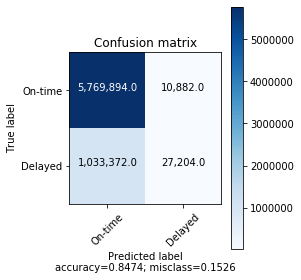

Summary Stats
Precision = 0.7142782124665231
Recall = 0.025650212714600367
F1 Score = 0.0495220550087288
Class 0 precision = 0.8481064829745008
Class 0 recall = 0.9981175537678678
Class 0 F1 Measure = 0.9170176005451984
Class 1 precision = 0.7142782124665231
Class 1 recall = 0.025650212714600367
Class 1 F1 Measure = 0.0495220550087288
Weighted recall = 0.8473614572090429
Weighted precision = 0.8273598452014015
Weighted F(1) Score = 0.7825346861003801
Weighted F(0.5) Score = 0.7562227560061363
Weighted false positive rate = 0.8235936907265747

In [0]:
#5. Evaluate the model 
print('-------Testing Metrics---------')
predictions1 = predictAndEvaluate(test_data, model1)

## 6.2. Additional Models

### 6.2.1 Oversampling the Minority Class
There is a distinct class imbalance between delayed and on-time flights of about 1:5 (3 months training set) to 1:7 (full dataset). This needs to be addressed if we hope to train any classifier successfully. We first start with a simple approach of oversampling the minority class. For every record of minorty class we generate 2 more identical records from the same class. So we end up with 17 million on-time flights and 9 million delayed flights in the training data. When we feed this model as is into our hyper tuned full model from section 6.1 above, we notice that while the model really gets a boost on the number of true positives, it also gets a big jump on the false positives. The number of false negatives significantly drops. In other words, on our validation data with our minority class, we get a huge boost with our recall scores jumping up to 0.28 but our precision drops significantly from 0.72 to 0.29. 

To avoid overfitting, we retrain the model with validation on training enabled and set early stopping with a validation tolerance of 0.01. With this option we partition the training data such that 80% of the records are used for training and 20% are used for validation during training. If the estimator does not see a validation score improvement larger than 0.01, it will stop the training. With this approach we were able to bring the class 1 precision to 0.71% but our AUC score went down to 0.57 indicating that this model performed poorly. So we moved onto oversampling with SMOTE which is discussed in section 6.2.2. 

*Notebook [here](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/4061768275121143/command/4061768275121172) gives details of our oversampling runs*

### 6.2.2 SMOTE Implementation

We decided to give SMOTE - synthetic minority oversampling technique - a try. SMOTE dates back to a paper from 2002 (https://arxiv.org/pdf/1106.1813.pdf) and is different from regular oversampling in that it constructs synthetic examples by interpolating between nearest neighbors in the minority class:

<figure>
<img src="https://miro.medium.com/max/4800/1*6UFpLFl59O9e3e38ffTXJQ.png" width="400px"/><br>
  <figureCaption>Figure 19: SMOTE and ADASYN ( Handling Imbalanced Data Set )</figureCaption>
</figure>

*(Illustration credit: "SMOTE and ADASYN ( Handling Imbalanced Data Set )", Indresh Bhattacharyya, https://medium.com/coinmonks/smote-and-adasyn-handling-imbalanced-data-set-34f5223e167)*
  
We found a couple of implementations that already worked on vectorized data, and might just slot into the stage just before classification. In hindsight, this was a mistake: Although all of our features for classification are vectorized, there are really three different classes of features that need to be addressed:
  
  - The features that must absolutely be equal between two nearest neighbors for this process to even make sense ("grouping features") - in our case, the origin and destination airports, and additionally the month of the flight. This latter one is a judgment call - the more conditions we put here, the fewer nearest neighbors will be found, but the ones we find would be more relevant. The day of the week and the time block of the day were other candidates, but they curtailed our selection too much.
  
  - The features that may not be interpolated, but that need to be chosen "as-is" from either candidate a or b. These are the categorical features we selected.
  
  - The continuous numerical features we will be interpolating, such as continous weather data.
  
With that in mind, ideally the SMOTE process would have happened before the complete feature vectorization, because it is tricky and error-prone and brittle to extract the groups of features after the fact. Anyway, we adapted one of the implementations to work for our scenario by retaining relevant feature groups in our dataset past the initial transformations and into the SMOTE code. 
  
SMOTE relies on the concept of nearest neighbor search, which is always a difficult problem, and exacerbated by ditributed computing. We picked an implementation that relies on locality-sensitive hashing, one of the accepted SOA solutions, to sort similar data points to the same nodes. To accomplish this, the hash inputs were carefully selected to include both the grouping features and the continuous features. 
  
At the time of this writing, we have completed the SMOTE process for the train set, yielding 12 million extra samples to bring our ratio to 15 million delayed flights to 17 million on-time flights. However, the new balanced set does not perform well for training our classifiers. Generation runs take about 45 minutes each. With a week left in the project, we made the decision that we would not have enough time to debug the problem, given the pervasive cluster performance problems. 

Our abandoned SMOTE implementation is below and can also be found in this [notebook](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/3450569410569792/command/3450569410569793). Note that it also includes the final transformation pipeline before the SMOTE code.

In [0]:
# SMOTE processor, adapted from: https://medium.com/@haoyunlai/smote-implementation-in-pyspark-76ec4ffa2f1d

def smote(vectorized_sdf, multiplier, bucket_length, k=5, seed=7):
    all_categoricals = ['month', 'day_of_month', 'day_of_week', 'op_carrier', 'dep_blk'] + (['equipment_delayed'] if run != 'basic' else [])
    group_categoricals = ['originIndex','destinationIndex']
    dataInput_min = vectorized_sdf[vectorized_sdf['label'] == 1]
    #dataInput_maj = vectorized_sdf[vectorized_sdf['label'] == 0]
    
    # drop the original features, we will have to reassemble them later
    dataInput_min = dataInput_min.drop("features")

    # LSH, bucketed random projection
    brp = BucketedRandomProjectionLSH(inputCol="hash_vector", outputCol="hashes",seed=seed, bucketLength=bucket_length)
    # smote only applies on existing minority instances    
    model = brp.fit(dataInput_min)
    
    # here distance is calculated from brp's param inputCol
    # but only for pairs with the same group_categoricals (i.e. origin, dest, month etc. see 2.3 above)
    pairs_raw = model.approxSimilarityJoin(dataInput_min, dataInput_min, 3.0, distCol="distance") \
      .filter(" and ".join([f"(datasetA.{c} == datasetB.{c})" for c in group_categoricals]))
    
    # remove self-comparison (distance 0)
    pairs = pairs_raw.filter(pairs_raw.distance > 0)
    
    rows = Window \
      .partitionBy("datasetA")
    
    rows_ordered = rows \
      .orderBy("distance")

    pairs_numbered = pairs \
      .withColumn("r_num", f.row_number().over(rows_ordered))

    # filter by filter_categoricals
    
    knn = pairs_numbered \
      .filter(pairs_numbered.r_num <= k)

    #print("original:",dataInput_min.count())
    #print("set of 5 nearest neighbors: ", knn.count())
    # list to store batches of synthetic data
    result = []
    
    # udf for vector interpolation includes a random factor [0,1]
    random_interpolate = f.udf(lambda arr: arr[0]+random.uniform(0, 1)*(arr[0]-arr[1]), VectorUDT())
    
    # retain original columns
    original_cols = dataInput_min.columns
    
    for i in range(multiplier):
        print(f"generating batch {i} of synthetic instances")
        # logic to randomly select neighbor: pick the largest random number generated row as the neighbour
        random_sample = knn \
                            .withColumn("rand", f.rand()) \
                            .withColumn('max_rand', f.max('rand').over(rows)) \
                            .where(f.col('rand') == f.col('max_rand')) \
                            .drop('max_rand','rand','r_num')
        
        # create synthetic feature numerical part *** only from 'numericals'
        synth = random_sample.select('*', random_interpolate(f.array('datasetA.numeric_Scaled', 'datasetB.numeric_Scaled')).alias('numeric_Scaled'))
        
        # for categorical cols, either pick original or the neighbor's categorical values
        choice = random.choice(['datasetA','datasetB'])
        for c in all_categoricals:
          synth = synth.withColumn(f"{c}classVec",f.col(f"{choice}.{c}classVec"))
          
        # add label
        synth = synth.withColumn("label",f.col("datasetA.label"))
                  
        # then drop the extra columns
        synth = synth.drop('datasetA','datasetB')
        
        # and add to the list for later
        result.append(synth)
        # debug print("  count:", synth.count())
    
    # bring all the new synthetic samples together
    dfunion = reduce(DataFrame.unionAll, result)
    
    # union synthetic instances with original full (both minority and majority) df
    dfunion = dfunion.drop("distance")
    result_df = dfunion.union(vectorized_sdf.select(dfunion.columns))
    # merge the separate feature components back together
    assembler = VectorAssembler(inputCols=[c + "classVec" for c in all_categoricals] + ["numeric_Scaled"], outputCol="features")
    assembled_result_df = assembler.transform(result_df)
    
    return assembled_result_df
    

### 6.2.3. Model for Busy Blocks of the Day
In our EDA we observe that flight delays keep accumulating as the day proceeds and is at the highest between 5 to 7pm before it starts to decline for the day. We are curious to see if a model specifically trained for that period would do better at predicting delays for that time. Ideally for such a model, we would use hyper parameter tuning all over as we are dealing with a subset of our training data. We have just used the same set of hyper parameters as before. We observe that with this model, our precision goes up to 0.75 for delayed flight but drops by 7 points to 0.78 for on-time flights. Our recall nearly doubles. We are not able to predict about 5% of the delayed flights correctly with this model. The AUC score does not change much from the full model.

[Model for 5-7pm Departure Block](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/4061768275133776/command/4061768275133803)

Test Area Under ROC: 0.6629439862671995
Test Area Under PR: 0.38486819670879946
Accuracy = 0.782562 
Test Error = 0.217438

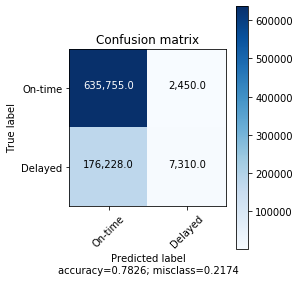

Summary Stats
Precision = 0.7489754098360656
Recall = 0.039828264446599614
F1 Score = 0.07563451251435607
Class 0 precision = 0.7829658995323794
Class 0 recall = 0.9961611081078964
Class 0 F1 Measure = 0.8767897679473281
Class 1 precision = 0.7489754098360656
Class 1 recall = 0.039828264446599614
Class 1 F1 Measure = 0.07563451251435607
Weighted recall = 0.7825621879346706
Weighted precision = 0.7753740533007935
Weighted F(1) Score = 0.6978500833115516
Weighted F(0.5) Score = 0.6719581179280071
Weighted false positive rate = 0.7465728153801745

In [0]:
# Load the data and preprocess it before feeding it to the pipeline (look at Cmd 48 for method definitions)
train_data, test_data = loadEtlData(valDuringTrain = False)

# Create the estimator for our model
gbt = GBTClassifier(maxIter = 14, maxDepth = 5, maxBins = 27) 

# Create an end to end pipeline
stages = createStages(train_data, outcome, run)
stages += [gbt]
pipeline = Pipeline(stages = stages)

model2 = pipeline.fit(train_data.where('dep_blk in (17,18)').cache())

#Evaluate test data
predictions2 = predictAndEvaluate(test_data.where('dep_blk in (17,18)').cache(), model2)

d
### 6.2.4. Model for Winter Holiday Season
Our EDA shows that summer months,July through August, and winter holidays see higher flight delays than rest of the year. We therefore, train a model just for winter holidays to see if this model is able to predict flight delays in holiday season better that the over all model discussed in sec 6.1. With this model our class 1 precision improves by three points to 0.74 and our class 0 precision stays unaffected. Our recall also improves marginally and we are abel to predict 2.8% of delayed flights correctly with this model. OUr AUC score increases by one point to 0.675 with this model.

[Model for winter holidays](https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/4061768275133858/command/4061768275134556)

Test Area Under ROC: 0.6751555808871625
Test Area Under PR: 0.3038586806246067
Accuracy = 0.844761 
Test Error = 0.155239

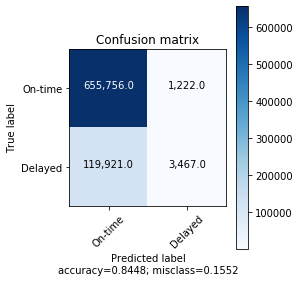

Summary Stats
Precision = 0.7393900618468756
Recall = 0.028098356404188413
F1 Score = 0.05413930682323914
Class 0 precision = 0.845398277891442
Class 0 recall = 0.998139968157229
Class 0 F1 Measure = 0.9154416101573652
Class 1 precision = 0.7393900618468756
Class 1 recall = 0.028098356404188413
Class 1 F1 Measure = 0.05413930682323914
Weighted recall = 0.844761304311054
Weighted precision = 0.8286367304107636
Weighted F(1) Score = 0.7792563219672196
Weighted F(0.5) Score = 0.753480778495666
Weighted false positive rate = 0.8185229797496366

In [0]:
# Load the data and preprocess it before feeding it to the pipeline (look at Cmd 48 for method definitions)
train_data, test_data = loadEtlData(valDuringTrain = False)

# Create the estimator for our model
gbt = GBTClassifier(maxIter = 14, maxDepth = 5, maxBins = 27) 

# Create an end to end pipeline
stages = createStages(train_data, outcome, run)
stages += [gbt]
pipeline = Pipeline(stages = stages)

model3 = pipeline.fit(
  train_data.where('(month == 11 and day_of_month >= 22) or (month == 12) or (month == 1 and day_of_month <= 3)').cache())

#Evaluate test data
predictions3 = predictAndEvaluate(
  test_data.where('(month == 11 and day_of_month >= 22) or (month == 12) or (month == 1 and day_of_month <= 3)').cache(), model3)

# 7. Conclusion
The confusion matrix (in percentage) of our results on the full model are shown below. As mentioned in section 2.3, we care about maximizing the true positives and minimizing the false positives in our prediction. False negatives maintains our status quo. It just means we are no better or worse off than we were before. Our model predicts 27,204 true positives and 10,882 false positives giving us precision of 71% on our predictions. However, it is to be noted that the model is only able to predict 2.57% of the total delayed flights correctly.

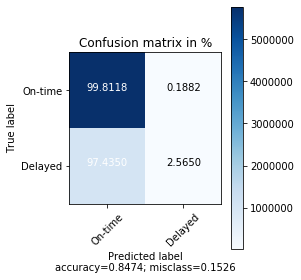

In [0]:
metrics = MulticlassMetrics(predictions1.select('prediction', 'label').rdd.map(tuple))
    
# Confusion Matrics normalized
plot_confusion_matrix(metrics.confusionMatrix().toArray(), 
                      title='Confusion matrix in %',
                      target_names = ['On-time', 'Delayed'], 
                      normalize=True)

<figure>
  <img src = "https://raw.githubusercontent.com/chitraagastya/MIDS_Projects/master/Flight_delays/dist_depblk.png"><br>
  <figureCaption>Figure 20: Distribution of departure and delays by departure block</figureCaption>
</figure>

We theorize the low recall as follows: departure block plays an important role in the model determining a false negative or false positive. The distribution of the departue blocks in *Figure 20* above shows that the number of flights departing between 6 AM and 7PM are more of less uniform; however, delays keep accumulating over the day until they peak between 5 to 7PM. Delays are very few as the day beings. So the model is likely to predict false negatives for delays until later in the day when it starts predicting more of the true positives. As the day builds up, the number of delays start aggregating to a point after which they start declining (after 7pm). At this stage the model is likely to predict more false positives for delays because it has seen a lot of delays in the recent past. Since the overall number of flights departing significantly declines after 7pm, the number of false negatives far outweigh the number of false positives for delayed flights, giving us a much lower recall on the minority class. 
 
We have an imbalanced class distribution with 7 on time flights for every delayed flight in the full dataset. This is likely to result in poor predictability for the minority class. We also have very limited features that give us more information about the delay itself. Other than weather and a delayed aircraft flag, we don't have any information in the dataset that could give us insights into other types of delays. Weather delays only account for less than 20% of overall delays, of which only 6% are related to extreme weather. Given this limited information, the model is able to discriminate between the classes. The model is able to predict 99.8% of the on-time flights correctly and has an overall accuracy of 85% and a weighted precision of 83%. These scores are better than those published by Chakrabarty et al, in their paper, [A Data Mining Approach to Flight Arrival Delay Prediction for American Airlines](https://arxiv.org/abs/1903.06740), which also takes a similar GBT approach.

With these metrics, it will not be practical to use this model to predict delay on a per flight basis. However, this model could still be useful for driving business decisions in auxiliary services related to air travel like deciding on whether to stock up more food in nearby bistros, or getting extra rooms ready for potential overnight delays in motels close to airports. 

As future work, we would also like to invest more time in SMOTE. We tried to reduce the class imbalance by employing this technique. While the theory of it is appealing and the technique sounds promising, we were unable to reap its benefits. The feature importance from our estimator shows that our feature engineering efforts are in the right direction. Adding the weather related indicators and the aircraft delay features were critical in helping our model differentiate the two classes. We are confident that by using SMOTE and augmenting the features with meaningful information related to crew schedules, aircraft maintenance logs, NAS scheduling patterns etc. we would be able to build a more robust model with enough predictive power for individual flights.

# 8. Application of Course Concepts

It is fair to say that we learned a lot during this project. But we also deepened our understanding of certain concepts that were discussed in the course, and some that were mentioned peripherally:

## 8.1. Lazy evaluation

Spark uses lazy evaluation, which means an expression is not evaluated until its results are needed (triggered by an action). This allows Spark to be both efficient about the iteration of datasets, not retrieving or computing what will not be used, and be robust against node failures - if data is lost along the way, it can always be recomputed. This concept can have severe performance implications if not used correctly. For example, a complicated pivot query is not actually computed in the line of code that defines it. If we subsequently perform more than one action on the resulting dataset without caching, we might execute complex computations twice. Staying on top of this requires rigorous saving of intermediate results (we passed on in-memory caching since we were not sure how much memory pressure we would put on our shared cluster.), and starting new datasets from the saved files when new large batches of work are about to happen. Lazy evaluation also makes debugging complex, as an error could have been made many steps before the action that triggers it.

## 8.2. DataFrames and SparkSQL

Although we did not discuss them much in the class, we were immediately guided to use DataFrames for the final project. While it is still possible and sometimes desirable to drop down to the RDD level of working, the majority of future Spark work will be done at the DataFrame level. DataFrames bring a Pandas-like structure of tables with named columns to Spark, which allows for much richer semantics in the methods that can be implemented for the end-user (us). Anything that a database user will be familiar with can be found here, from project and filtering over simple and complex joins, to sampling, aggregation, and pivoting. It is almost a natural consequence that a dialect of SQL is now also provided, and works as an alternative way for formulating queries on DataFrames. SparkSQL is not quite mature - we found cases where certain expression columns would work anywhere except at the end of the select statement, to name just one quirk - and its query optimizer is not up to par with the state of the art that can be found in single-node databases. In particular, it seems to do an inferior job of predicate push-down and estimation of source statistics, and one should beware of joining on anything other than simple columns. Learning which way to work - SQL or DataFrame methods - is an ongoing learning process for us. Together, DataFrames and SparkSQL enable complex processes that would require much effort to develop from scratch. On the other hand, they bring a new hidden layer of functionality, graph-scheduling and optimization into play, and when things are not as fast as they should be, it might be hard to understand why.

## 8.3. SparkML and pipelines 

While the project prompt still makes it sound a bit like we would be writing our machine learning algorithms from scratch, a good selection of ML machinery on DataFrames is readily available in the SparkML package. Later in the project we also came to appreciate pipelines of transformers, and so the later stages of our transformation code take advantage of them. Pipelines allow for a wonderfully easy chaining of transformers, and there are many transformers already provided to accomplish tasks like string indexing, imputing and scaling. One caveat it that pipelines make debugging harder - at their point of execution they will flag a bug that was made many lines before, but without source code location information. Another thing to observe about pipelines is that Spark will make no attempt to schedule them to run in parallel, and they only work on one input stream / one output stream. Certain transformers like the imputer and scaler have APIs that allow to transform several columns at the same time, but others like the string indexer unfortunately do not, and we see all of those performing full scans each of the input data, in sequence. This is an obvious future optimization point for pipelines that has been noted by many parties. Similarly, it is *theoretically* possible to write transformers that create graphs that can execute in parallel, nobody seems to have done so. In summary, pipelines are a wonderful feature and easy to use, so easy in fact that one must be careful not to create totally serialized transformation pipelines.

## 8.4. Page rank

We use the page rank algorithm to determine the importance of airports. We reason that a hub airport, an airport with more links, or airport with high betweeness centrality (such as ATL), is an important airport. On the other hand, airports that tend to be final destinations (such as SAV) are less important and will receive lower page ranks because they will have far fewer connections than hub airports. A delay to such remote airports will not cause a rippling effect on the air traffic network. We then use the page rank of both origin and destination airport for a flight as a feature in our model. We use GraphFrame's page rank implementation, perform this computation only on the training set, and reuse it for evaluation and testing.

## 8.5. Decision Trees and Gradient Boosted Trees

Is a supervised machine learning approach that recursively partitions data until the bottom nodes can predict a data point's class. In theory, you could split the data until there is just one data point in each terminal node, but this would not generalize to new data. Therefore, it is best to specify the amount of data required in each split, and the depth and width of the tree. Decision trees by themselves are not a go-to concept in machine learning as they have been outperformed by other networks such as neural network. They do, however, provide excellent explainability (we can reason about why a classification was made), parallelizability, and lastly perform competitively when placed into ensembles like Random Forests or Gradient Boosted Trees. We explain the gradient boosting algorithm in detail in our section 5.3.2, and implement a small version of it in section 5.3.2.

## 8.6. SMOTE and oversampling

When there is an extreme imbalance of positives and negatives in a classification dataset, there are too few examples of the minority class for a model to effectively learn the decision boundary. In this case, we have an imbalance such that we have far more negatives (on time) than positives (delayed) in our dataset. This means most algorithms will not succesfully catch the flight delays. One way around this problem is to duplicate examples of the minority class until the data is more evenly split, a process called oversampling. A more sophisticiated technique is called the "Synthetic Minority Oversampling TEchnique", or SMOTE. In short, SMOTE synthesizes new training examples from existing ones by partly-random interpolation. This is meant to improve on duplicating examples because it introduces new data that the algorithm can learn from. We spent substantial time developing a SMOTE algorithm that is true to the original 2002 paper, and we also have a fallback implementation of simple oversampling. The details of our SMOTE implementation can be found in section 6.2.2.

**References:**
- https://www.transportation.gov/briefing-room/air-travel-consumer-report-december-2019-full-year-2019-numbers
- https://www.nytimes.com/2020/02/19/business/air-travel-delays-airlines.html?auth=login-google
- https://www.transportation.gov/briefing-room/dot1219#:~:text=2018%20On%2DTime%20Performance,arrival%20rate%20of%2079.2%20percent.&text=For%20the%20full%20year%202018%2C%20reporting%20carriers%20posted%20an%20on,from%2080.2%20percent%20in%202017.
- https://aspmhelp.faa.gov/index/Types_of_Delay.html#:~:text=as%20delay%20propagation.-,NAS%20Delay,are%20also%20reported%20through%20OPSNET.